# Otimização com Muitos Objetivos por Evolução Diferencial Aplicada ao Escalonamento Dinâmico de Projeto de Software


### QP4. Influencia das estrategias dinamicas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon, friedmanchisquare
import scikit_posthocs as sp

from dspsp_analysis import metrics_dataset

%matplotlib inline

pd.set_option('display.float_format', '{:.2E}'.format)
pd.options.display.max_columns = 40

data = metrics_dataset(filepath="../hypervolume/metrics-rq4.csv")

dataAcc = metrics_dataset(filepath="../hypervolume/accuracy-rq4.csv", metric="accuracy")
dataStab = metrics_dataset(filepath="../hypervolume/stability-rq4.csv", metric="stability")

alpha = 0.05 # nível de significância

# configuração do gráfico de comparação pareada
heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}

In [2]:
def hv_mean(data, instance_id, algorithm_id, grouping="event", metric="hypervolume"):
    df = data[(data.algorithm ==  algorithm_id) & (data.instance == instance_id)]
    df = df.groupby(["instance", "algorithm", grouping], as_index=False)[metric].mean()
    return df


def hv_measures(data, grouping="event", limit=None, metric="hypervolume"):
    instance_ids = list(data.instance.unique())
    algorithm_ids = list(data.algorithm.unique())
    measures = {}
    for inst in instance_ids:
        measures[inst] = {}
        for alg in algorithm_ids:
            measures[inst][alg] = hv_mean(data, inst, alg, grouping, metric)[:limit]
    return measures

def hv_measures_nonzero(data, grouping="event", limit=None):
    instance_ids = list(data.instance.unique())
    algorithm_ids = list(data.algorithm.unique())
    measures = {}
    for inst in instance_ids:
        measures[inst] = {}
        for alg in algorithm_ids:
            mean = hv_mean(data, inst, alg, grouping)[:limit]
            measures[inst][alg] = mean[mean.hypervolume != 0]
    return measures


def mean_hypervolume(data):
    return data.groupby(["instance", "algorithm"], as_index=False)["hypervolume"].agg(['mean', 'std'])

def mean_accuracy(data):
    return data.groupby(["instance", "algorithm"], as_index=False)["accuracy"].agg(['mean', 'std'])

def mean_stability(data):
    return data.groupby(["instance", "algorithm"], as_index=False)["stability"].agg(['mean', 'std'])

def plot_hv(data, inst, algorithms):
    plt.figure(figsize=(8,6))
    plt.title("Instância {} \n{}".format(inst, " x ".join(algorithms)))
    plt.xlabel("Pontos de reescalonamento")
    plt.ylabel("Hipervolume")
    for alg in algorithms:
        plt.plot(data[inst][alg].hypervolume, "-o", markersize=3, lw=.5)
    plt.legend(algorithms, loc="lower right")
    plt.show()
    
def plot_acc(data, inst, algorithms):
    plt.figure(figsize=(8,6))
    plt.title("Instância {} \n{}".format(inst, " x ".join(algorithms)))
    plt.xlabel("Pontos de reescalonamento")
    plt.ylabel("Acurácia")
    for alg in algorithms:
        plt.plot(data[inst][alg].accuracy, "-o", markersize=3, lw=.5)
    plt.legend(algorithms, loc="lower right")
    plt.show()
    
def plot_stab(data, inst, algorithms):
    plt.figure(figsize=(8,6))
    plt.title("Instância {} \n{}".format(inst, " x ".join(algorithms)))
    plt.xlabel("Pontos de reescalonamento")
    plt.ylabel("Estabilidade")
    for alg in algorithms:
        plt.plot(data[inst][alg].stability, "-o", markersize=3, lw=.5)
    plt.legend(algorithms, loc="lower right")
    plt.show()

def boxplot_hv(data, inst, algorithms):
    plt.title("Instância {} \n{}".format(inst, " x ".join(algorithms)))
    plt.ylabel("Hipervolume")
    plt.boxplot([data[inst][alg].hypervolume for alg in algorithms], labels=algorithms)
    plt.show()
    

def combined_plot_hv(data, inst, algorithms, ylabel="Hipervolume"):
    
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 4))
    f.suptitle("Instância {} \n{}".format(inst, " x ".join(algorithms)))

    for alg in algorithms:
        ax1.plot(data[inst][alg].hypervolume, "-o", markersize=3, lw=.5)
    ax1.set_xlabel("Pontos de reescalonamento")
    ax1.set_ylabel(ylabel)
    ax1.legend(algorithms, loc="lower right")

    ax2.yaxis.tick_right()
    ax2.yaxis.set_label_position("right")
    ax2.boxplot([data[inst][alg].hypervolume for alg in algorithms], labels=algorithms)
    ax2.set_ylabel(ylabel)

    f.subplots_adjust(wspace=0.1, top=0.85)
    
def combined_plot_acc(data, inst, algorithms, ylabel="Acurácia"):
    
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 4))
    f.suptitle("Instância {} \n{}".format(inst, " x ".join(algorithms)))

    for alg in algorithms:
        ax1.plot(data[inst][alg].accuracy, "-o", markersize=3, lw=.5)
    ax1.set_xlabel("Pontos de reescalonamento")
    ax1.set_ylabel(ylabel)
    ax1.legend(algorithms, loc="lower right")

    ax2.yaxis.tick_right()
    ax2.yaxis.set_label_position("right")
    ax2.boxplot([data[inst][alg].accuracy for alg in algorithms], labels=algorithms)
    ax2.set_ylabel(ylabel)

    f.subplots_adjust(wspace=0.1, top=0.85)
    
def combined_plot_stab(data, inst, algorithms, ylabel="Estabilidade"):
    
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 4))
    f.suptitle("Instância {} \n{}".format(inst, " x ".join(algorithms)))

    for alg in algorithms:
        ax1.plot(data[inst][alg].stability, "-o", markersize=3, lw=.5)
    ax1.set_xlabel("Pontos de reescalonamento")
    ax1.set_ylabel(ylabel)
    ax1.legend(algorithms, loc="lower right")

    ax2.yaxis.tick_right()
    ax2.yaxis.set_label_position("right")
    ax2.boxplot([data[inst][alg].stability for alg in algorithms], labels=algorithms)
    ax2.set_ylabel(ylabel)

    f.subplots_adjust(wspace=0.1, top=0.85)
    

In [3]:
mean_hv = mean_hypervolume(data).reset_index()
mean_hv.pivot(index='algorithm', columns='instance')

mean                           \
instance                  ST10_DT10_SE10_DE1_SK4-5 ST10_DT10_SE10_DE1_SK6-7   
algorithm                                                                     
CMODESDEDynamic                           1.26E+00                 1.28E+00   
CMODESDEExternalDynamic                   1.21E+00                 1.26E+00   
CMODESDEExternalReDynamic                 1.21E+00                 1.26E+00   
CMODESDEFullDynamic                       1.25E+00                 1.29E+00   
CMODESDEFullReDynamic                     1.25E+00                 1.28E+00   
CMODESDERepairDynamic                     1.31E+00                 1.37E+00   
NSGAIIIDynamic                            1.23E+00                 1.30E+00   

                                                                             \
instance                  ST10_DT10_SE15_DE1_SK4-5 ST10_DT10_SE15_DE1_SK6-7   
algorithm                                                                     
CMODESDEDynamic                           1.30E+00                 1.24E+00   
CMODESDEExternalDynamic                   1.29E+00                 1.21E+00   
CMODESDEExternalReDynamic                 1.29E+00                 1.20E+00   
CMODESDEFullDynamic                       1.31E+00                 1.23E+00   
CMODESDEFullReDynamic                     1.30E+00                 1.22E+00   
CMODESDERepairDynamic                     1.42E+00                 1.29E+00   
NSGAIIIDynamic                            1.41E+00                 1.22E+00   

                                                                           \
instance                  ST10_DT10_SE5_DE1_SK4-5 ST10_DT10_SE5_DE1_SK6-7   
algorithm                                                                   
CMODESDEDynamic                          1.32E+00                1.27E+00   
CMODESDEExternalDynamic                  1.25E+00                1.20E+00   
CMODESDEExternalReDynamic                1.24E+00                1.18E+00   
CMODESDEFullDynamic                      1.32E+00                1.27E+00   
CMODESDEFullReDynamic                    1.32E+00                1.26E+00   
CMODESDERepairDynamic                    1.35E+00                1.26E+00   
NSGAIIIDynamic                           1.35E+00                1.24E+00   

                                                                             \
instance                  ST20_DT10_SE10_DE1_SK4-5 ST20_DT10_SE10_DE1_SK6-7   
algorithm                                                                     
CMODESDEDynamic                           1.29E+00                 1.28E+00   
CMODESDEExternalDynamic                   1.24E+00                 1.18E+00   
CMODESDEExternalReDynamic                 1.23E+00                 1.17E+00   
CMODESDEFullDynamic                       1.29E+00                 1.26E+00   
CMODESDEFullReDynamic                     1.27E+00                 1.25E+00   
CMODESDERepairDynamic                     1.38E+00                 1.30E+00   
NSGAIIIDynamic                            1.31E+00                 1.24E+00   

                                                                             \
instance                  ST20_DT10_SE15_DE1_SK4-5 ST20_DT10_SE15_DE1_SK6-7   
algorithm                                                                     
CMODESDEDynamic                           1.24E+00                 1.23E+00   
CMODESDEExternalDynamic                   1.20E+00                 1.20E+00   
CMODESDEExternalReDynamic                 1.19E+00                 1.19E+00   
CMODESDEFullDynamic                       1.24E+00                 1.24E+00   
CMODESDEFullReDynamic                     1.22E+00                 1.21E+00   
CMODESDERepairDynamic                     1.30E+00                 1.26E+00   
NSGAIIIDynamic                            1.26E+00                 1.20E+00   

                                                                           \
instance                  ST20_DT1

In [4]:
mean_acc = mean_accuracy(dataAcc).reset_index()
mean_acc.pivot(index='algorithm', columns='instance')

mean                           \
instance                  ST10_DT10_SE10_DE1_SK4-5 ST10_DT10_SE10_DE1_SK6-7   
algorithm                                                                     
CMODESDEDynamic                           8.92E-01                 9.07E-01   
CMODESDEExternalDynamic                   8.69E-01                 9.01E-01   
CMODESDEExternalReDynamic                 8.71E-01                 8.95E-01   
CMODESDEFullDynamic                       8.91E-01                 9.05E-01   
CMODESDEFullReDynamic                     8.86E-01                 9.01E-01   
CMODESDERepairDynamic                     9.25E-01                 9.55E-01   
NSGAIIIDynamic                            8.85E-01                 9.14E-01   

                                                                             \
instance                  ST10_DT10_SE15_DE1_SK4-5 ST10_DT10_SE15_DE1_SK6-7   
algorithm                                                                     
CMODESDEDynamic                           9.51E-01                 8.94E-01   
CMODESDEExternalDynamic                   9.53E-01                 8.85E-01   
CMODESDEExternalReDynamic                 9.53E-01                 8.80E-01   
CMODESDEFullDynamic                       9.51E-01                 8.95E-01   
CMODESDEFullReDynamic                     9.53E-01                 8.86E-01   
CMODESDERepairDynamic                     9.87E-01                 9.23E-01   
NSGAIIIDynamic                            9.84E-01                 8.90E-01   

                                                                           \
instance                  ST10_DT10_SE5_DE1_SK4-5 ST10_DT10_SE5_DE1_SK6-7   
algorithm                                                                   
CMODESDEDynamic                          9.28E-01                9.01E-01   
CMODESDEExternalDynamic                  9.03E-01                8.73E-01   
CMODESDEExternalReDynamic                9.00E-01                8.60E-01   
CMODESDEFullDynamic                      9.27E-01                9.04E-01   
CMODESDEFullReDynamic                    9.28E-01                8.97E-01   
CMODESDERepairDynamic                    9.52E-01                9.01E-01   
NSGAIIIDynamic                           9.58E-01                8.93E-01   

                                                                             \
instance                  ST20_DT10_SE10_DE1_SK4-5 ST20_DT10_SE10_DE1_SK6-7   
algorithm                                                                     
CMODESDEDynamic                           9.32E-01                 9.45E-01   
CMODESDEExternalDynamic                   9.26E-01                 9.09E-01   
CMODESDEExternalReDynamic                 9.25E-01                 9.10E-01   
CMODESDEFullDynamic                       9.34E-01                 9.42E-01   
CMODESDEFullReDynamic                     9.26E-01                 9.35E-01   
CMODESDERepairDynamic                     9.81E-01                 9.67E-01   
NSGAIIIDynamic                            9.59E-01                 9.50E-01   

                                                                             \
instance                  ST20_DT10_SE15_DE1_SK4-5 ST20_DT10_SE15_DE1_SK6-7   
algorithm                                                                     
CMODESDEDynamic                           9.30E-01                 9.39E-01   
CMODESDEExternalDynamic                   9.19E-01                 9.23E-01   
CMODESDEExternalReDynamic                 9.20E-01                 9.24E-01   
CMODESDEFullDynamic                       9.31E-01                 9.46E-01   
CMODESDEFullReDynamic                     9.23E-01                 9.25E-01   
CMODESDERepairDynamic                     9.63E-01                 9.55E-01   
NSGAIIIDynamic                            9.62E-01                 9.32E-01   

                                                                           \
instance                  ST20_DT1

In [5]:
mean_stab = mean_stability(dataStab).reset_index()
mean_stab.pivot(index='algorithm', columns='instance')

mean                           \
instance                  ST10_DT10_SE10_DE1_SK4-5 ST10_DT10_SE10_DE1_SK6-7   
algorithm                                                                     
CMODESDEDynamic                           1.14E-01                 1.12E-01   
CMODESDEExternalDynamic                   1.06E-01                 1.17E-01   
CMODESDEExternalReDynamic                 9.83E-02                 1.41E-01   
CMODESDEFullDynamic                       1.45E-01                 1.44E-01   
CMODESDEFullReDynamic                     1.23E-01                 1.71E-01   
CMODESDERepairDynamic                     1.63E-01                 1.71E-01   
NSGAIIIDynamic                            1.54E-01                 1.87E-01   

                                                                             \
instance                  ST10_DT10_SE15_DE1_SK4-5 ST10_DT10_SE15_DE1_SK6-7   
algorithm                                                                     
CMODESDEDynamic                           1.44E-01                 1.64E-01   
CMODESDEExternalDynamic                   1.43E-01                 1.71E-01   
CMODESDEExternalReDynamic                 1.05E-01                 1.42E-01   
CMODESDEFullDynamic                       1.57E-01                 2.04E-01   
CMODESDEFullReDynamic                     1.43E-01                 1.43E-01   
CMODESDERepairDynamic                     2.69E-01                 1.80E-01   
NSGAIIIDynamic                            4.63E-01                 1.77E-01   

                                                                           \
instance                  ST10_DT10_SE5_DE1_SK4-5 ST10_DT10_SE5_DE1_SK6-7   
algorithm                                                                   
CMODESDEDynamic                          1.23E-01                1.23E-01   
CMODESDEExternalDynamic                  1.16E-01                8.28E-02   
CMODESDEExternalReDynamic                1.02E-01                6.75E-02   
CMODESDEFullDynamic                      1.54E-01                5.71E-02   
CMODESDEFullReDynamic                    1.41E-01                9.41E-02   
CMODESDERepairDynamic                    1.10E-01                1.26E-01   
NSGAIIIDynamic                           1.62E-01                1.19E-01   

                                                                             \
instance                  ST20_DT10_SE10_DE1_SK4-5 ST20_DT10_SE10_DE1_SK6-7   
algorithm                                                                     
CMODESDEDynamic                           2.41E-01                 1.70E-01   
CMODESDEExternalDynamic                   1.58E-01                 1.28E-01   
CMODESDEExternalReDynamic                 1.81E-01                 1.47E-01   
CMODESDEFullDynamic                       2.14E-01                 1.69E-01   
CMODESDEFullReDynamic                     1.96E-01                 1.71E-01   
CMODESDERepairDynamic                     2.20E-01                 1.63E-01   
NSGAIIIDynamic                            2.40E-01                 1.76E-01   

                                                                             \
instance                  ST20_DT10_SE15_DE1_SK4-5 ST20_DT10_SE15_DE1_SK6-7   
algorithm                                                                     
CMODESDEDynamic                           2.43E-01                 1.64E-01   
CMODESDEExternalDynamic                   1.62E-01                 1.94E-01   
CMODESDEExternalReDynamic                 1.34E-01                 1.71E-01   
CMODESDEFullDynamic                       2.55E-01                 1.90E-01   
CMODESDEFullReDynamic                     2.28E-01                 1.79E-01   
CMODESDERepairDynamic                     2.66E-01                 2.40E-01   
NSGAIIIDynamic                            2.67E-01                 1.91E-01   

                                                                           \
instance                  ST20_DT1

In [6]:
hv_execution = hv_measures(data, grouping="execution")
hv_event = hv_measures(data, limit=60)

acc_execution = hv_measures(dataAcc, grouping="execution", metric="accuracy")
acc_event = hv_measures(dataAcc, limit=60, metric="accuracy")

stab_execution = hv_measures(dataStab, grouping="execution", metric="stability")
stab_event = hv_measures(dataStab, limit=59, metric="stability")

## Comparação entre os algoritmos SEM o uso de estratégias dinâmicas

### Instância ST10_DT10_SE5_DE1_SK4-5

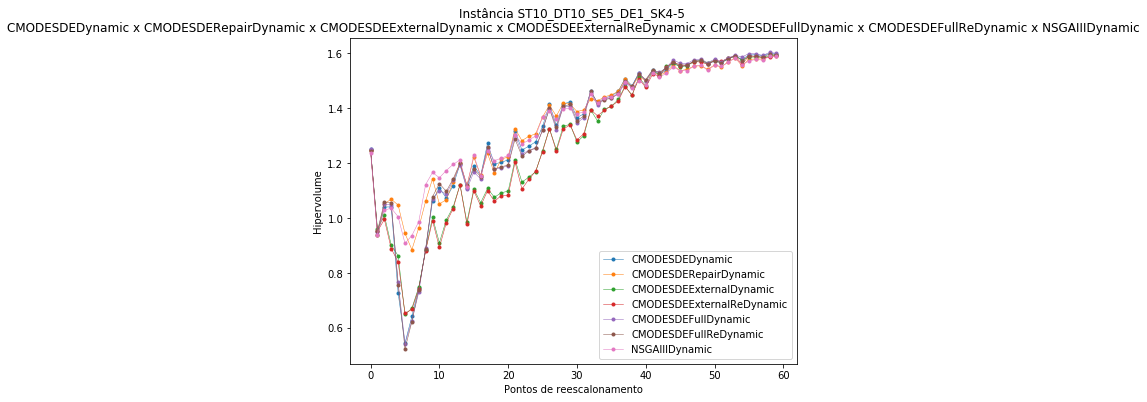

In [7]:
inst = "ST10_DT10_SE5_DE1_SK4-5"
algorithms = ["CMODESDEDynamic", "CMODESDERepairDynamic", "CMODESDEExternalDynamic", 
              "CMODESDEExternalReDynamic", "CMODESDEFullDynamic", "CMODESDEFullReDynamic", "NSGAIIIDynamic"]    

datasets = [hv_event[inst][alg].hypervolume for alg in algorithms]
datasetsAcc = [acc_event[inst][alg].accuracy for alg in algorithms]
datasetsStab = [stab_event[inst][alg].stability for alg in algorithms]

plot_hv(hv_event, inst, algorithms)
#display(combined_plot_hv(hv_event, inst, algorithms))

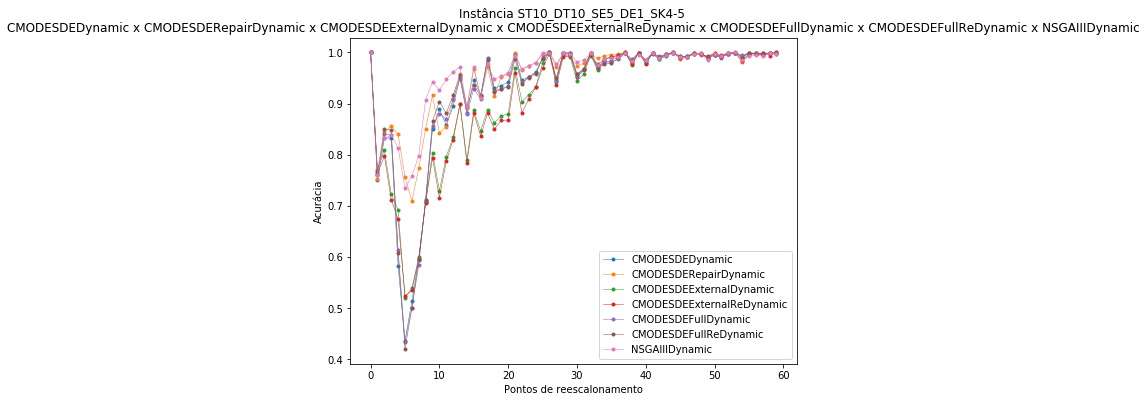

In [8]:
#display(combined_plot_acc(acc_event, inst, algorithms))
plot_acc(acc_event, inst, algorithms)

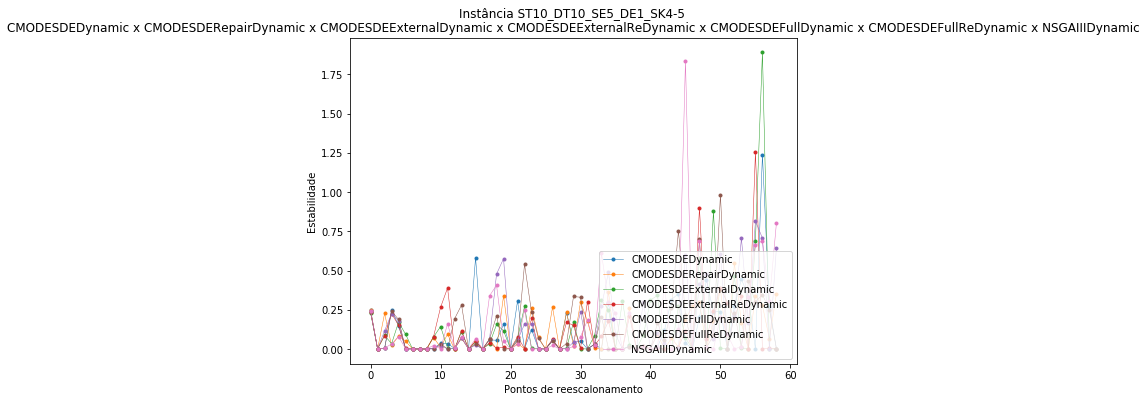

In [9]:
#display(combined_plot_stab(stab_event, inst, algorithms))
plot_stab(stab_event, inst, algorithms)

In [10]:
stat, p = friedmanchisquare(*datasets)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')


Statistics=69.864, p=4.359489E-13
Distribuições diferentes (rejeitar H0)


In [11]:
stat, p = friedmanchisquare(*datasetsAcc)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')

Statistics=32.891, p=1.100530E-05
Distribuições diferentes (rejeitar H0)


In [12]:
stat, p = friedmanchisquare(*datasetsStab)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')

Statistics=0.493, p=9.979198E-01
Mesmas distribuições (falhou em rejeitar H0)


In [13]:
df = pd.DataFrame({alg: hv_event[inst][alg].hypervolume for alg in algorithms})
df = df.melt(var_name="algorithm", value_name="hypervolume")
pc = sp.posthoc_conover(df, group_col="algorithm", val_col="hypervolume")
pc

CMODESDEDynamic  CMODESDEExternalDynamic  \
CMODESDEDynamic                  -1.00E+00                 3.24E-01   
CMODESDEExternalDynamic           3.24E-01                -1.00E+00   
CMODESDEExternalReDynamic         2.77E-01                 9.20E-01   
CMODESDEFullDynamic               9.96E-01                 3.22E-01   
CMODESDEFullReDynamic             9.36E-01                 3.65E-01   
CMODESDERepairDynamic             8.73E-01                 4.09E-01   
NSGAIIIDynamic                    8.62E-01                 4.17E-01   

                           CMODESDEExternalReDynamic  CMODESDEFullDynamic  \
CMODESDEDynamic                             2.77E-01             9.96E-01   
CMODESDEExternalDynamic                     9.20E-01             3.22E-01   
CMODESDEExternalReDynamic                  -1.00E+00             2.75E-01   
CMODESDEFullDynamic                         2.75E-01            -1.00E+00   
CMODESDEFullReDynamic                       3.14E-01             9.33E-01   
CMODESDERepairDynamic                       3.54E-01             8.69E-01   
NSGAIIIDynamic                              3.62E-01             8.58E-01   

                           CMODESDEFullReDynamic  CMODESDERepairDynamic  \
CMODESDEDynamic                         9.36E-01               8.73E-01   
CMODESDEExternalDynamic                 3.65E-01               4.09E-01   
CMODESDEExternalReDynamic               3.14E-01               3.54E-01   
CMODESDEFullDynamic                     9.33E-01               8.69E-01   
CMODESDEFullReDynamic                  -1.00E+00               9.36E-01   
CMODESDERepairDynamic                   9.36E-01              -1.00E+00   
NSGAIIIDynamic                          9.25E-01               9.89E-01   

                           NSGAIIIDynamic  
CMODESDEDynamic                  8.62E-01  
CMODESDEExternalDynamic          4.17E-01  
CMODESDEExternalReDynamic        3.62E-01  
CMODESDEFullDynamic              8.58E-01  
CMODESDEFullReDynamic            9.25E-01  
CMODESDERepairDynamic            9.89E-01  
NSGAIIIDynamic                  -1.00E+00

(<matplotlib.axes._subplots.AxesSubplot at 0x7fc7b18e28d0>,
 <matplotlib.colorbar.ColorbarBase at 0x7fc7b1569ba8>)

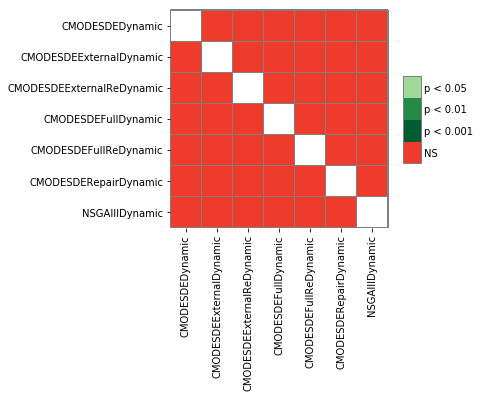

In [14]:
sp.sign_plot(pc, **heatmap_args)

### Instância ST10_DT10_SE10_DE1_SK4-5

In [15]:
hv_execution = hv_measures(data, grouping="execution")
hv_event = hv_measures(data, limit=57)

acc_execution = hv_measures(dataAcc, grouping="execution", metric="accuracy")
acc_event = hv_measures(dataAcc, limit=57, metric="accuracy")

stab_execution = hv_measures(dataStab, grouping="execution", metric="stability")
stab_event = hv_measures(dataStab, limit=56, metric="stability")

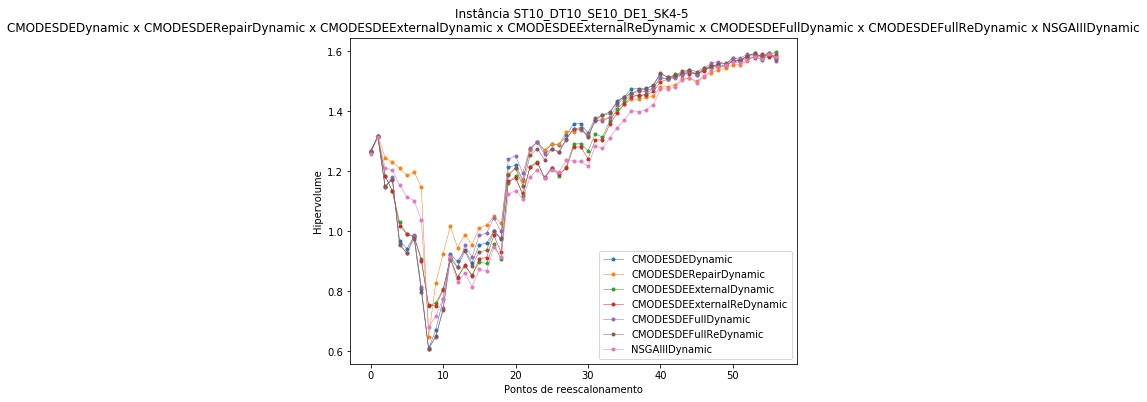

In [16]:
inst = "ST10_DT10_SE10_DE1_SK4-5"
algorithms = ["CMODESDEDynamic", "CMODESDERepairDynamic", "CMODESDEExternalDynamic", 
              "CMODESDEExternalReDynamic", "CMODESDEFullDynamic", "CMODESDEFullReDynamic", "NSGAIIIDynamic"]

datasets = [hv_event[inst][alg].hypervolume for alg in algorithms]
datasetsAcc = [acc_event[inst][alg].accuracy for alg in algorithms]
datasetsStab = [stab_event[inst][alg].stability for alg in algorithms]

#display(combined_plot_hv(hv_event, inst, algorithms))
plot_hv(hv_event, inst, algorithms)


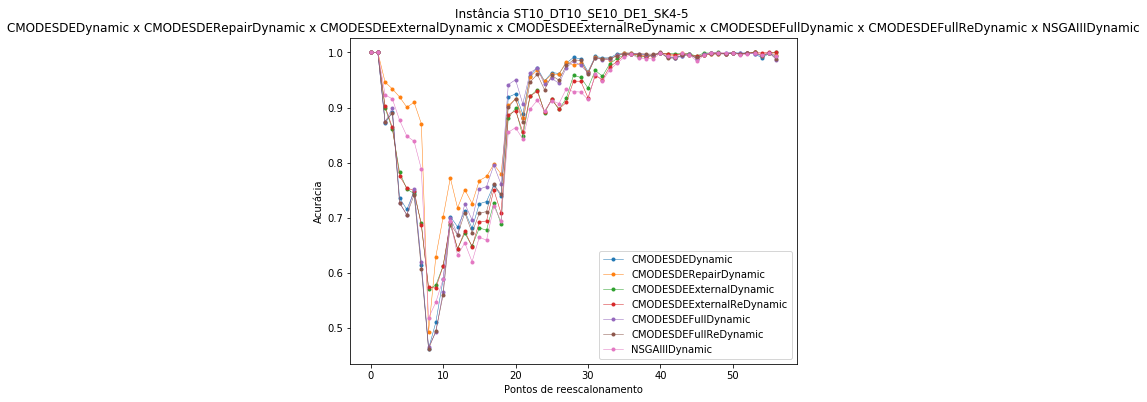

In [17]:
#display(combined_plot_acc(acc_event, inst, algorithms))
plot_acc(acc_event, inst, algorithms)

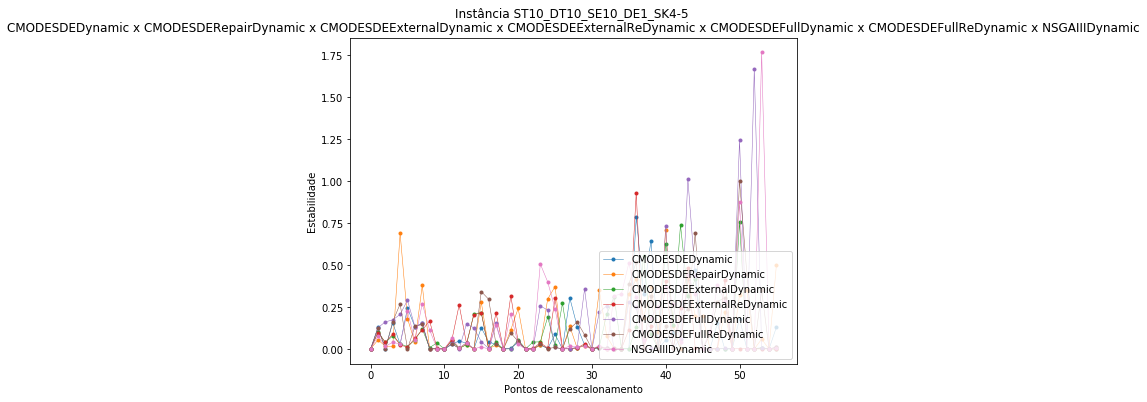

In [18]:
#display(combined_plot_stab(stab_event, inst, algorithms))
plot_stab(stab_event, inst, algorithms)

In [19]:
trashComment='''
#print(*datasets)
aux = datasets[0][:]
del aux[57]
del aux[58]
del aux[59]
datasets[0] = aux
aux1 = datasets[1][:]
del aux1[57]
del aux1[58]
del aux1[59]
datasets[1] = aux1
aux2 = datasets[4][:]
del aux2[57]
del aux2[58]
del aux2[59]
datasets[4] = aux2
aux3 = datasets[5][:]
del aux3[57]
del aux3[58]
del aux3[59]
datasets[5] = aux3
aux4 = datasets[6][:]
del aux4[57]
del aux4[58]
del aux4[59]
datasets[6] = aux4
#print(*datasets)

auxAcc = datasetsAcc[0][:]
del auxAcc[57]
del auxAcc[58]
del auxAcc[59]
datasetsAcc[0] = auxAcc
auxAcc1 = datasetsAcc[1][:]
del auxAcc1[57]
del auxAcc1[58]
del auxAcc1[59]
datasetsAcc[1] = auxAcc1
auxAcc2 = datasetsAcc[4][:]
del auxAcc2[57]
del auxAcc2[58]
del auxAcc2[59]
datasetsAcc[4] = auxAcc2
auxAcc3 = datasetsAcc[5][:]
del auxAcc3[57]
del auxAcc3[58]
del auxAcc3[59]
datasetsAcc[5] = auxAcc3
auxAcc4 = datasetsAcc[6][:]
del auxAcc4[57]
del auxAcc4[58]
del auxAcc4[59]
datasetsAcc[6] = auxAcc4

#print(*datasetsStab)
auxStab = datasetsStab[0][:]
del auxStab[56]
del auxStab[57]
del auxStab[58]
datasetsStab[0] = auxStab
auxStab1 = datasetsStab[1][:]
del auxStab1[56]
del auxStab1[57]
del auxStab1[58]
datasetsStab[1] = auxStab1
auxStab2 = datasetsStab[4][:]
del auxStab2[56]
del auxStab2[57]
del auxStab2[58]
datasetsStab[4] = auxStab2
auxStab3 = datasetsStab[5][:]
del auxStab3[56]
del auxStab3[57]
del auxStab3[58]
datasetsStab[5] = auxStab3
auxStab4 = datasetsStab[6][:]
del auxStab4[56]
del auxStab4[57]
del auxStab4[58]
datasetsStab[6] = auxStab4
'''

In [20]:
#print(*datasets)
stat, p = friedmanchisquare(*datasets)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')


Statistics=71.842, p=1.712071E-13
Distribuições diferentes (rejeitar H0)


In [21]:
stat, p = friedmanchisquare(*datasetsAcc)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')

Statistics=51.415, p=2.444163E-09
Distribuições diferentes (rejeitar H0)


In [22]:
stat, p = friedmanchisquare(*datasetsStab)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')

Statistics=6.694, p=3.500759E-01
Mesmas distribuições (falhou em rejeitar H0)


In [23]:
df = pd.DataFrame({alg: hv_event[inst][alg].hypervolume for alg in algorithms})
df = df.melt(var_name="algorithm", value_name="hypervolume")
pc = sp.posthoc_conover(df, group_col="algorithm", val_col="hypervolume")
pc

CMODESDEDynamic  CMODESDEExternalDynamic  \
CMODESDEDynamic                  -1.00E+00                 6.17E-01   
CMODESDEExternalDynamic           6.17E-01                -1.00E+00   
CMODESDEExternalReDynamic         5.33E-01                 9.02E-01   
CMODESDEFullDynamic               9.94E-01                 6.11E-01   
CMODESDEFullReDynamic             9.08E-01                 7.00E-01   
CMODESDERepairDynamic             8.62E-01                 5.00E-01   
NSGAIIIDynamic                    3.52E-01                 6.66E-01   

                           CMODESDEExternalReDynamic  CMODESDEFullDynamic  \
CMODESDEDynamic                             5.33E-01             9.94E-01   
CMODESDEExternalDynamic                     9.02E-01             6.11E-01   
CMODESDEExternalReDynamic                  -1.00E+00             5.28E-01   
CMODESDEFullDynamic                         5.28E-01            -1.00E+00   
CMODESDEFullReDynamic                       6.12E-01             9.02E-01   
CMODESDERepairDynamic                       4.26E-01             8.69E-01   
NSGAIIIDynamic                              7.58E-01             3.48E-01   

                           CMODESDEFullReDynamic  CMODESDERepairDynamic  \
CMODESDEDynamic                         9.08E-01               8.62E-01   
CMODESDEExternalDynamic                 7.00E-01               5.00E-01   
CMODESDEExternalReDynamic               6.12E-01               4.26E-01   
CMODESDEFullDynamic                     9.02E-01               8.69E-01   
CMODESDEFullReDynamic                  -1.00E+00               7.73E-01   
CMODESDERepairDynamic                   7.73E-01              -1.00E+00   
NSGAIIIDynamic                          4.14E-01               2.69E-01   

                           NSGAIIIDynamic  
CMODESDEDynamic                  3.52E-01  
CMODESDEExternalDynamic          6.66E-01  
CMODESDEExternalReDynamic        7.58E-01  
CMODESDEFullDynamic              3.48E-01  
CMODESDEFullReDynamic            4.14E-01  
CMODESDERepairDynamic            2.69E-01  
NSGAIIIDynamic                  -1.00E+00

(<matplotlib.axes._subplots.AxesSubplot at 0x7fc7b151c630>,
 <matplotlib.colorbar.ColorbarBase at 0x7fc7b14386d8>)

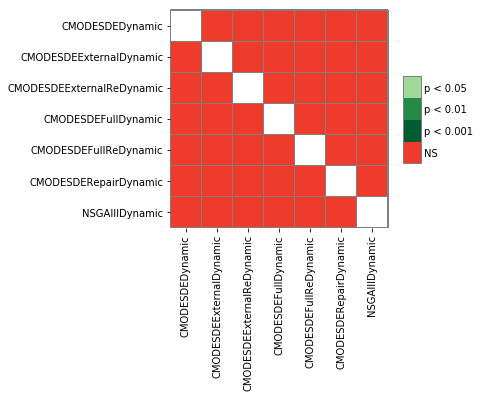

In [24]:
sp.sign_plot(pc, **heatmap_args)

### Instância ST10_DT10_SE15_DE1_SK4-5

In [25]:
hv_execution = hv_measures(data, grouping="execution")
hv_event = hv_measures(data, limit=48)

acc_execution = hv_measures(dataAcc, grouping="execution", metric="accuracy")
acc_event = hv_measures(dataAcc, limit=48, metric="accuracy")

stab_execution = hv_measures(dataStab, grouping="execution", metric="stability")
stab_event = hv_measures(dataStab, limit=47, metric="stability")

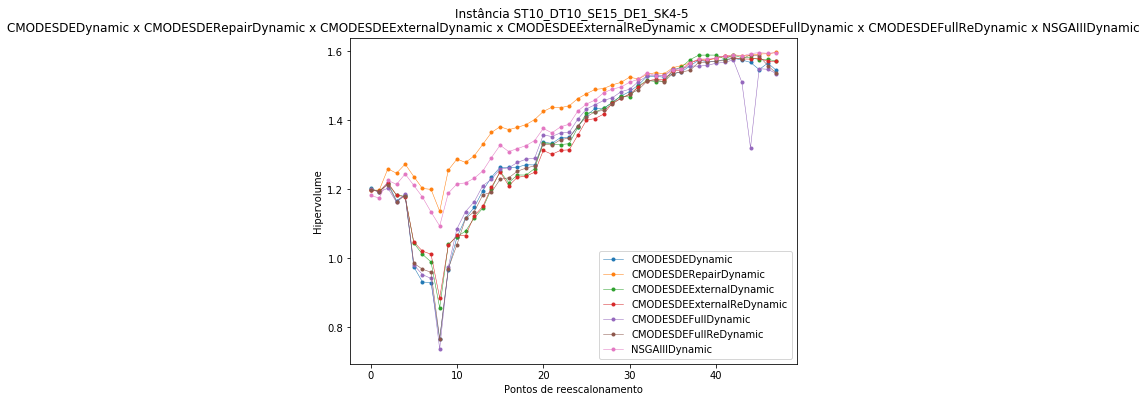

In [26]:
inst = "ST10_DT10_SE15_DE1_SK4-5"
algorithms = ["CMODESDEDynamic", "CMODESDERepairDynamic", "CMODESDEExternalDynamic", 
              "CMODESDEExternalReDynamic", "CMODESDEFullDynamic", "CMODESDEFullReDynamic", "NSGAIIIDynamic"]

datasets = [hv_event[inst][alg].hypervolume for alg in algorithms]
datasetsAcc = [acc_event[inst][alg].accuracy for alg in algorithms]
datasetsStab = [stab_event[inst][alg].stability for alg in algorithms]

#display(combined_plot_hv(hv_event, inst, algorithms))
plot_hv(hv_event, inst, algorithms)


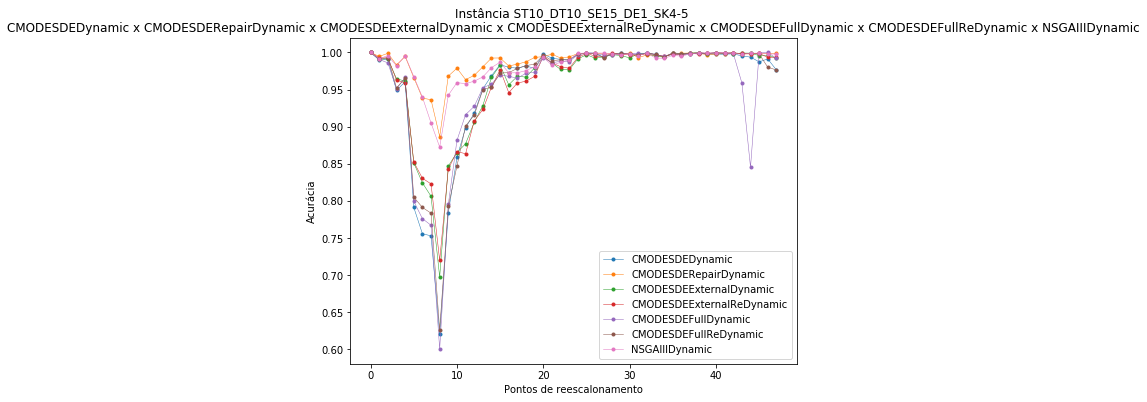

In [27]:
plot_acc(acc_event, inst, algorithms)

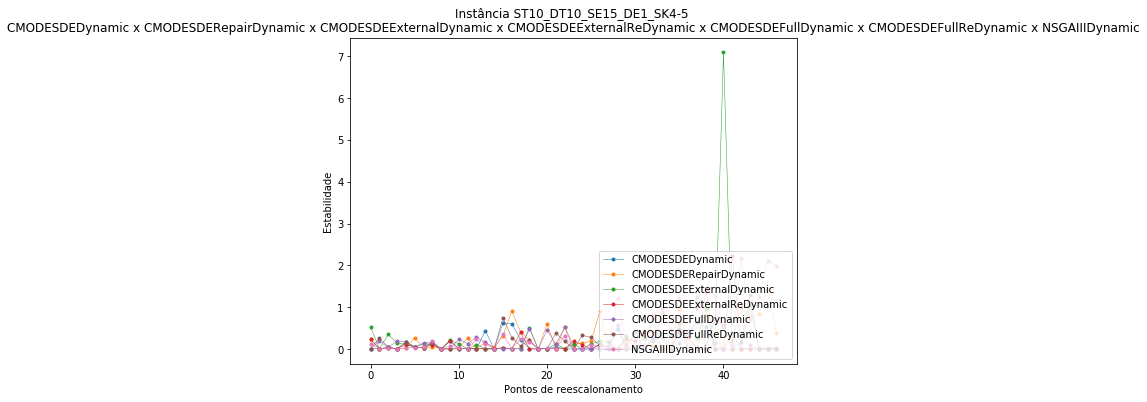

In [28]:
plot_stab(stab_event, inst, algorithms)

In [29]:
trashComment='''
#print(*datasets)#48,51,48,49,55,47,59
#print("-------------")
#print(*datasetsAcc)#48,51,48,49,55,47,59
#print("--------------")
#print(datasetsStab)#47,50,47,48,54,46,58

aux = datasets[0][:]
del aux[48]
datasets[0] = aux
aux1 = datasets[1][:]
del aux1[48]
del aux1[49]
del aux1[50]
del aux1[51]
datasets[1] = aux1
aux2 = datasets[2][:]
del aux2[48]
datasets[2] = aux2
aux3 = datasets[3][:]
del aux3[48]
del aux3[49]
datasets[3] = aux3
aux4 = datasets[4][:]
del aux4[48]
del aux4[49]
del aux4[50]
del aux4[51]
del aux4[52]
del aux4[53]
del aux4[54]
del aux4[55]
datasets[4] = aux4
aux5 = datasets[6][:]
del aux5[48]
del aux5[49]
del aux5[50]
del aux5[51]
del aux5[52]
del aux5[53]
del aux5[54]
del aux5[55]
del aux5[56]
del aux5[57]
del aux5[58]
del aux5[59]
datasets[6] = aux5
#print(*datasets)

auxAcc = datasetsAcc[0][:]
del auxAcc[48]
datasetsAcc[0] = auxAcc
auxAcc1 = datasetsAcc[1][:]
del auxAcc1[48]
del auxAcc1[49]
del auxAcc1[50]
del auxAcc1[51]
datasetsAcc[1] = auxAcc1
auxAcc2 = datasetsAcc[2][:]
del auxAcc2[48]
datasetsAcc[2] = auxAcc2
auxAcc3 = datasetsAcc[3][:]
del auxAcc3[48]
del auxAcc3[49]
datasetsAcc[3] = auxAcc3
auxAcc4 = datasetsAcc[4][:]
del auxAcc4[48]
del auxAcc4[49]
del auxAcc4[50]
del auxAcc4[51]
del auxAcc4[52]
del auxAcc4[53]
del auxAcc4[54]
del auxAcc4[55]
datasetsAcc[4] = auxAcc4
auxAcc5 = datasetsAcc[6][:]
del auxAcc5[48]
del auxAcc5[49]
del auxAcc5[50]
del auxAcc5[51]
del auxAcc5[52]
del auxAcc5[53]
del auxAcc5[54]
del auxAcc5[55]
del auxAcc5[56]
del auxAcc5[57]
del auxAcc5[58]
del auxAcc5[59]
datasetsAcc[6] = auxAcc5

#print(*datasetsStab)
auxStab = datasetsStab[0][:]
del auxStab[47]
datasetsStab[0] = auxStab
auxStab1 = datasetsStab[1][:]
del auxStab1[47]
del auxStab1[48]
del auxStab1[49]
del auxStab1[50]
datasetsStab[1] = auxStab1
auxStab2 = datasetsStab[2][:]
del auxStab2[47]
datasetsStab[2] = auxStab2
auxStab3 = datasetsStab[3][:]
del auxStab3[47]
del auxStab3[48]
datasetsStab[3] = auxStab3
auxStab4 = datasetsStab[4][:]
del auxStab4[47]
del auxStab4[48]
del auxStab4[49]
del auxStab4[50]
del auxStab4[51]
del auxStab4[52]
del auxStab4[53]
del auxStab4[54]
datasetsStab[4] = auxStab4
auxStab5 = datasetsStab[6][:]
del auxStab5[47]
del auxStab5[48]
del auxStab5[49]
del auxStab5[50]
del auxStab5[51]
del auxStab5[52]
del auxStab5[53]
del auxStab5[54]
del auxStab5[55]
del auxStab5[56]
del auxStab5[57]
del auxStab5[58]
datasetsStab[6] = auxStab5
'''

In [30]:
stat, p = friedmanchisquare(*datasets)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')


Statistics=146.580, p=4.086875E-29
Distribuições diferentes (rejeitar H0)


In [31]:
stat, p = friedmanchisquare(*datasetsAcc)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')

Statistics=44.015, p=7.340972E-08
Distribuições diferentes (rejeitar H0)


In [32]:
stat, p = friedmanchisquare(*datasetsStab)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')

Statistics=7.147, p=3.074489E-01
Mesmas distribuições (falhou em rejeitar H0)


In [33]:
df = pd.DataFrame({alg: hv_event[inst][alg].hypervolume for alg in algorithms})
df = df.melt(var_name="algorithm", value_name="hypervolume")
pc = sp.posthoc_conover(df, group_col="algorithm", val_col="hypervolume")
pc

CMODESDEDynamic  CMODESDEExternalDynamic  \
CMODESDEDynamic                  -1.00E+00                 8.53E-01   
CMODESDEExternalDynamic           8.53E-01                -1.00E+00   
CMODESDEExternalReDynamic         9.65E-01                 8.18E-01   
CMODESDEFullDynamic               8.61E-01                 7.18E-01   
CMODESDEFullReDynamic             9.07E-01                 7.62E-01   
CMODESDERepairDynamic             4.36E-02                 6.67E-02   
NSGAIIIDynamic                    2.02E-01                 2.75E-01   

                           CMODESDEExternalReDynamic  CMODESDEFullDynamic  \
CMODESDEDynamic                             9.65E-01             8.61E-01   
CMODESDEExternalDynamic                     8.18E-01             7.18E-01   
CMODESDEExternalReDynamic                  -1.00E+00             8.96E-01   
CMODESDEFullDynamic                         8.96E-01            -1.00E+00   
CMODESDEFullReDynamic                       9.42E-01             9.54E-01   
CMODESDERepairDynamic                       3.92E-02             2.84E-02   
NSGAIIIDynamic                              1.87E-01             1.47E-01   

                           CMODESDEFullReDynamic  CMODESDERepairDynamic  \
CMODESDEDynamic                         9.07E-01               4.36E-02   
CMODESDEExternalDynamic                 7.62E-01               6.67E-02   
CMODESDEExternalReDynamic               9.42E-01               3.92E-02   
CMODESDEFullDynamic                     9.54E-01               2.84E-02   
CMODESDEFullReDynamic                  -1.00E+00               3.29E-02   
CMODESDERepairDynamic                   3.29E-02              -1.00E+00   
NSGAIIIDynamic                          1.64E-01               4.56E-01   

                           NSGAIIIDynamic  
CMODESDEDynamic                  2.02E-01  
CMODESDEExternalDynamic          2.75E-01  
CMODESDEExternalReDynamic        1.87E-01  
CMODESDEFullDynamic              1.47E-01  
CMODESDEFullReDynamic            1.64E-01  
CMODESDERepairDynamic            4.56E-01  
NSGAIIIDynamic                  -1.00E+00

(<matplotlib.axes._subplots.AxesSubplot at 0x7fc7b2fefc18>,
 <matplotlib.colorbar.ColorbarBase at 0x7fc7b30e05c0>)

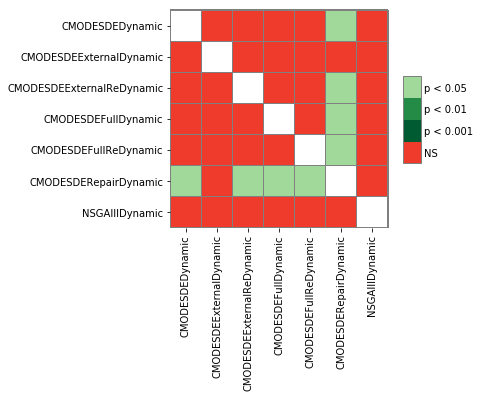

In [34]:
sp.sign_plot(pc, **heatmap_args)

In [35]:
hv_execution = hv_measures(data, grouping="execution")
hv_event = hv_measures(data, limit=60)

acc_execution = hv_measures(dataAcc, grouping="execution", metric="accuracy")
acc_event = hv_measures(dataAcc, limit=60, metric="accuracy")

stab_execution = hv_measures(dataStab, grouping="execution", metric="stability")
stab_event = hv_measures(dataStab, limit=59, metric="stability")

### Instância ST10_DT10_SE5_DE1_SK6-7

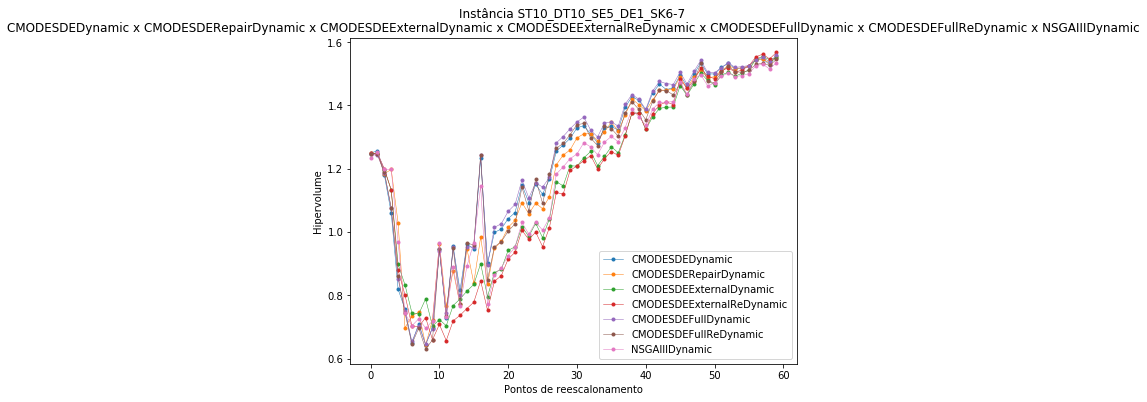

In [36]:
inst = "ST10_DT10_SE5_DE1_SK6-7"
algorithms = ["CMODESDEDynamic", "CMODESDERepairDynamic", "CMODESDEExternalDynamic", 
              "CMODESDEExternalReDynamic", "CMODESDEFullDynamic", "CMODESDEFullReDynamic", "NSGAIIIDynamic"]

datasets = [hv_event[inst][alg].hypervolume for alg in algorithms]
datasetsAcc = [acc_event[inst][alg].accuracy for alg in algorithms]
datasetsStab = [stab_event[inst][alg].stability for alg in algorithms]

plot_hv(hv_event, inst, algorithms)

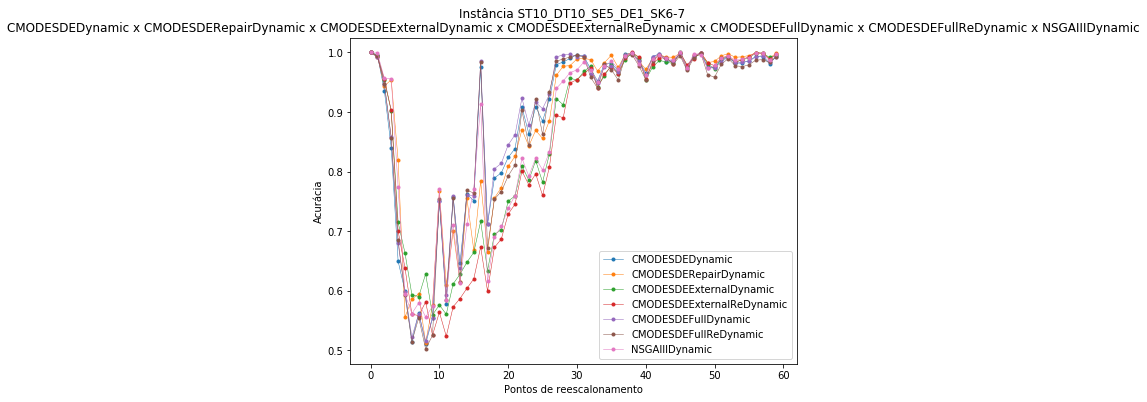

In [37]:
plot_acc(acc_event, inst, algorithms)

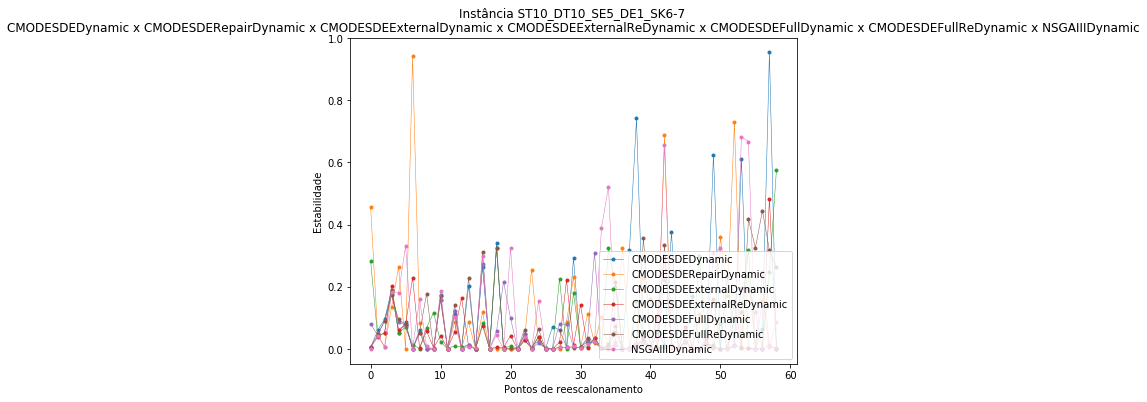

In [38]:
plot_stab(stab_event, inst, algorithms)

In [39]:
stat, p = friedmanchisquare(*datasets)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')


Statistics=122.907, p=3.992537E-24
Distribuições diferentes (rejeitar H0)


In [40]:
stat, p = friedmanchisquare(*datasetsAcc)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')

Statistics=44.245, p=6.610896E-08
Distribuições diferentes (rejeitar H0)


In [41]:
stat, p = friedmanchisquare(*datasetsStab)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')

Statistics=3.497, p=7.443700E-01
Mesmas distribuições (falhou em rejeitar H0)


In [42]:
df = pd.DataFrame({alg: hv_event[inst][alg].hypervolume for alg in algorithms})
df = df.melt(var_name="algorithm", value_name="hypervolume")
pc = sp.posthoc_conover(df, group_col="algorithm", val_col="hypervolume")
pc

CMODESDEDynamic  CMODESDEExternalDynamic  \
CMODESDEDynamic                  -1.00E+00                 2.35E-01   
CMODESDEExternalDynamic           2.35E-01                -1.00E+00   
CMODESDEExternalReDynamic         1.99E-01                 9.24E-01   
CMODESDEFullDynamic               8.51E-01                 1.69E-01   
CMODESDEFullReDynamic             7.71E-01                 3.70E-01   
CMODESDERepairDynamic             7.73E-01                 3.68E-01   
NSGAIIIDynamic                    3.55E-01                 7.92E-01   

                           CMODESDEExternalReDynamic  CMODESDEFullDynamic  \
CMODESDEDynamic                             1.99E-01             8.51E-01   
CMODESDEExternalDynamic                     9.24E-01             1.69E-01   
CMODESDEExternalReDynamic                  -1.00E+00             1.42E-01   
CMODESDEFullDynamic                         1.42E-01            -1.00E+00   
CMODESDEFullReDynamic                       3.21E-01             6.32E-01   
CMODESDERepairDynamic                       3.19E-01             6.35E-01   
NSGAIIIDynamic                              7.19E-01             2.66E-01   

                           CMODESDEFullReDynamic  CMODESDERepairDynamic  \
CMODESDEDynamic                         7.71E-01               7.73E-01   
CMODESDEExternalDynamic                 3.70E-01               3.68E-01   
CMODESDEExternalReDynamic               3.21E-01               3.19E-01   
CMODESDEFullDynamic                     6.32E-01               6.35E-01   
CMODESDEFullReDynamic                  -1.00E+00               9.98E-01   
CMODESDERepairDynamic                   9.98E-01              -1.00E+00   
NSGAIIIDynamic                          5.26E-01               5.24E-01   

                           NSGAIIIDynamic  
CMODESDEDynamic                  3.55E-01  
CMODESDEExternalDynamic          7.92E-01  
CMODESDEExternalReDynamic        7.19E-01  
CMODESDEFullDynamic              2.66E-01  
CMODESDEFullReDynamic            5.26E-01  
CMODESDERepairDynamic            5.24E-01  
NSGAIIIDynamic                  -1.00E+00

(<matplotlib.axes._subplots.AxesSubplot at 0x7fc7b2878f60>,
 <matplotlib.colorbar.ColorbarBase at 0x7fc7b2845358>)

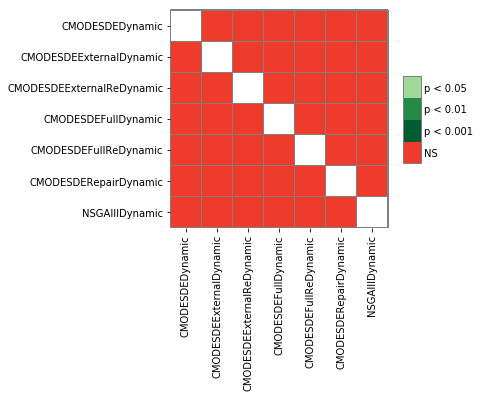

In [43]:
sp.sign_plot(pc, **heatmap_args)

### Instância ST10_DT10_SE10_DE1_SK6-7

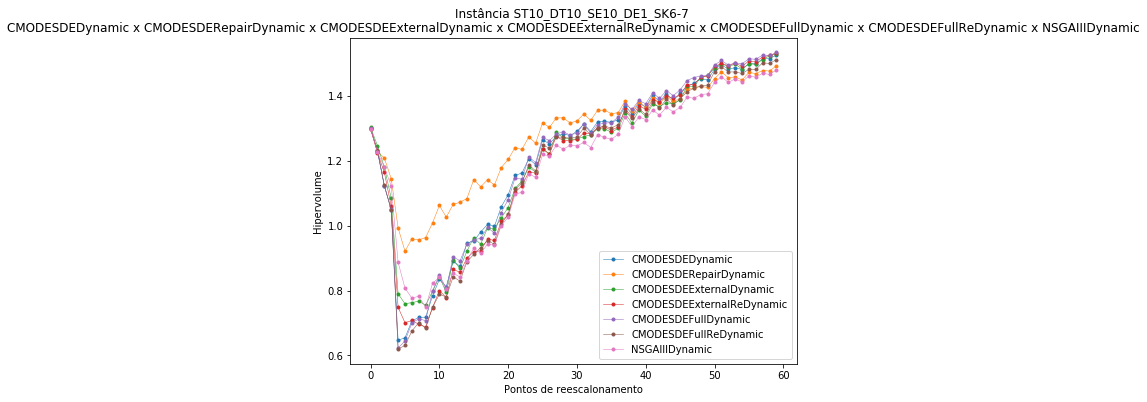

In [44]:
inst = "ST10_DT10_SE10_DE1_SK6-7"
algorithms = ["CMODESDEDynamic", "CMODESDERepairDynamic", "CMODESDEExternalDynamic", 
              "CMODESDEExternalReDynamic", "CMODESDEFullDynamic", "CMODESDEFullReDynamic", "NSGAIIIDynamic"] 

datasets = [hv_event[inst][alg].hypervolume for alg in algorithms]
datasetsAcc = [acc_event[inst][alg].accuracy for alg in algorithms]
datasetsStab = [stab_event[inst][alg].stability for alg in algorithms]

plot_hv(hv_event, inst, algorithms)

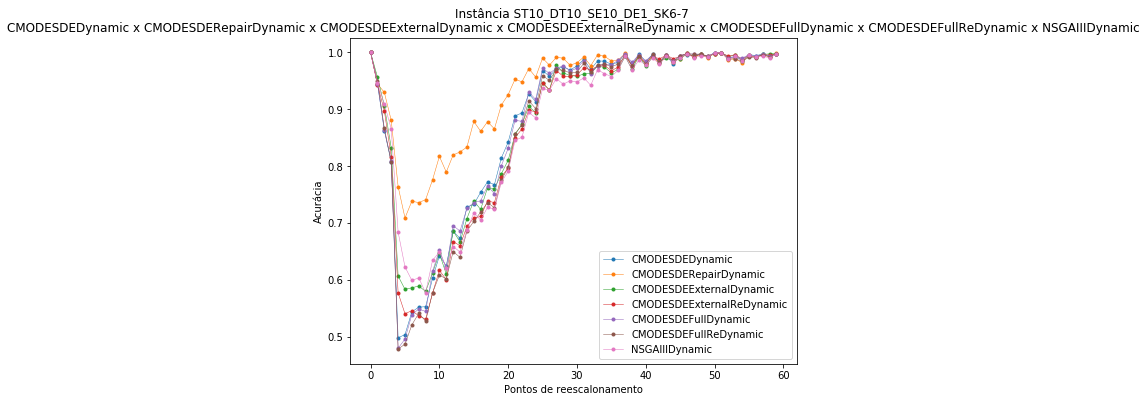

In [45]:
plot_acc(acc_event, inst, algorithms)

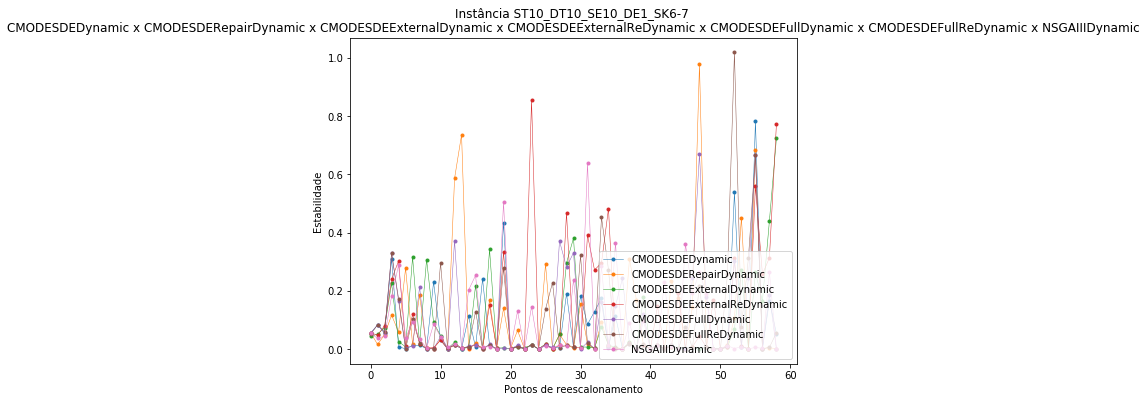

In [46]:
plot_stab(stab_event, inst, algorithms)

In [47]:
stat, p = friedmanchisquare(*datasets)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')


Statistics=151.436, p=3.845822E-30
Distribuições diferentes (rejeitar H0)


In [48]:
stat, p = friedmanchisquare(*datasetsAcc)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')

Statistics=80.077, p=3.443591E-15
Distribuições diferentes (rejeitar H0)


In [49]:
stat, p = friedmanchisquare(*datasetsStab)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')

Statistics=7.898, p=2.456663E-01
Mesmas distribuições (falhou em rejeitar H0)


In [50]:
df = pd.DataFrame({alg: hv_event[inst][alg].hypervolume for alg in algorithms})
df = df.melt(var_name="algorithm", value_name="hypervolume")
pc = sp.posthoc_conover(df, group_col="algorithm", val_col="hypervolume")
pc

CMODESDEDynamic  CMODESDEExternalDynamic  \
CMODESDEDynamic                  -1.00E+00                 7.95E-01   
CMODESDEExternalDynamic           7.95E-01                -1.00E+00   
CMODESDEExternalReDynamic         7.98E-01                 9.97E-01   
CMODESDEFullDynamic               8.67E-01                 6.69E-01   
CMODESDEFullReDynamic             6.00E-01                 7.92E-01   
CMODESDERepairDynamic             3.69E-01                 2.47E-01   
NSGAIIIDynamic                    3.14E-01                 4.55E-01   

                           CMODESDEExternalReDynamic  CMODESDEFullDynamic  \
CMODESDEDynamic                             7.98E-01             8.67E-01   
CMODESDEExternalDynamic                     9.97E-01             6.69E-01   
CMODESDEExternalReDynamic                  -1.00E+00             6.72E-01   
CMODESDEFullDynamic                         6.72E-01            -1.00E+00   
CMODESDEFullReDynamic                       7.89E-01             4.89E-01   
CMODESDERepairDynamic                       2.48E-01             4.64E-01   
NSGAIIIDynamic                              4.53E-01             2.41E-01   

                           CMODESDEFullReDynamic  CMODESDERepairDynamic  \
CMODESDEDynamic                         6.00E-01               3.69E-01   
CMODESDEExternalDynamic                 7.92E-01               2.47E-01   
CMODESDEExternalReDynamic               7.89E-01               2.48E-01   
CMODESDEFullDynamic                     4.89E-01               4.64E-01   
CMODESDEFullReDynamic                  -1.00E+00               1.55E-01   
CMODESDERepairDynamic                   1.55E-01              -1.00E+00   
NSGAIIIDynamic                          6.29E-01               5.71E-02   

                           NSGAIIIDynamic  
CMODESDEDynamic                  3.14E-01  
CMODESDEExternalDynamic          4.55E-01  
CMODESDEExternalReDynamic        4.53E-01  
CMODESDEFullDynamic              2.41E-01  
CMODESDEFullReDynamic            6.29E-01  
CMODESDERepairDynamic            5.71E-02  
NSGAIIIDynamic                  -1.00E+00

(<matplotlib.axes._subplots.AxesSubplot at 0x7fc7b3044b38>,
 <matplotlib.colorbar.ColorbarBase at 0x7fc7ac0cc6a0>)

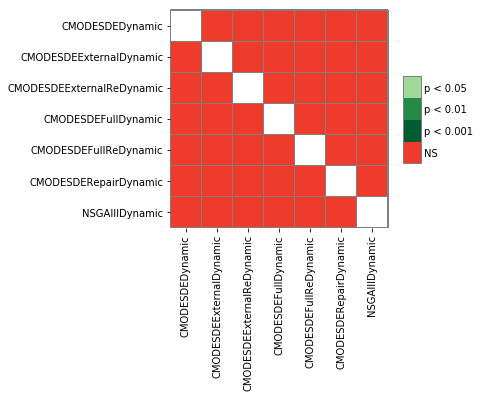

In [51]:
sp.sign_plot(pc, **heatmap_args)

### Instância ST10_DT10_SE15_DE1_SK6-7

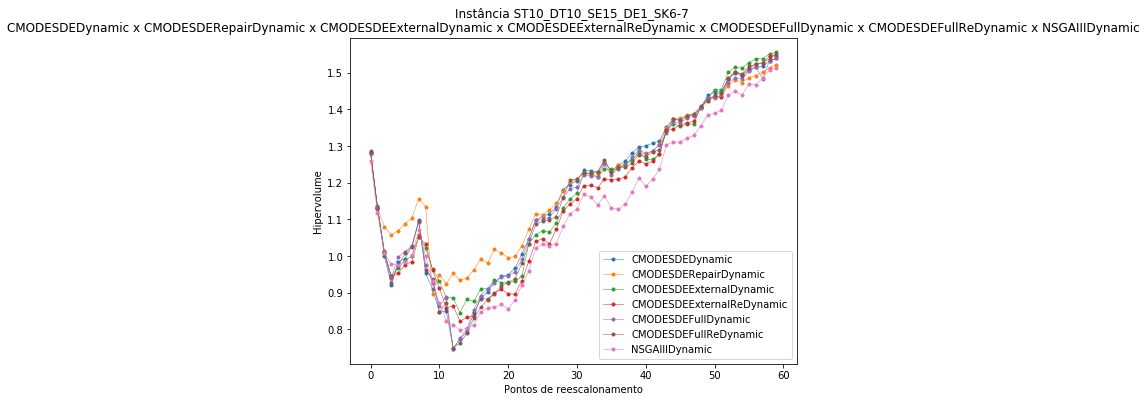

In [52]:
inst = "ST10_DT10_SE15_DE1_SK6-7"
algorithms = ["CMODESDEDynamic", "CMODESDERepairDynamic", "CMODESDEExternalDynamic", 
              "CMODESDEExternalReDynamic", "CMODESDEFullDynamic", "CMODESDEFullReDynamic", "NSGAIIIDynamic"]

datasets = [hv_event[inst][alg].hypervolume for alg in algorithms]
datasetsAcc = [acc_event[inst][alg].accuracy for alg in algorithms]
datasetsStab = [stab_event[inst][alg].stability for alg in algorithms]

plot_hv(hv_event, inst, algorithms)


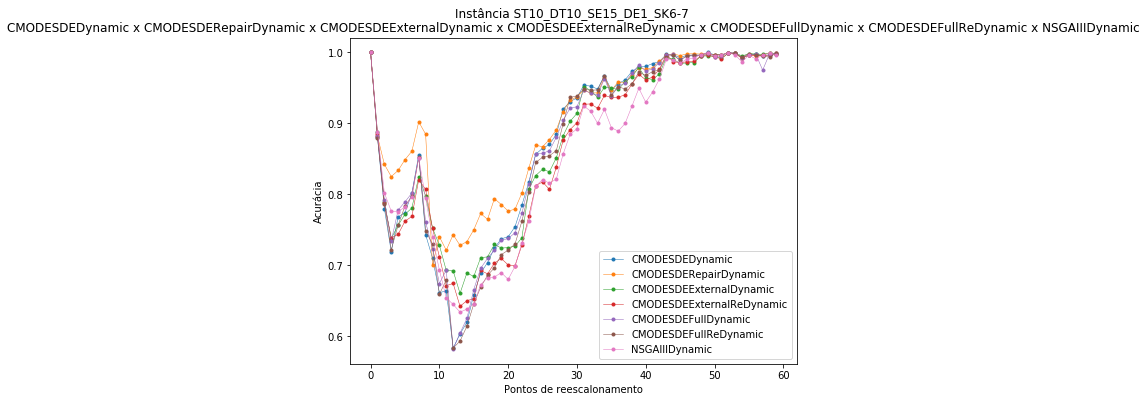

In [53]:
plot_acc(acc_event, inst, algorithms)


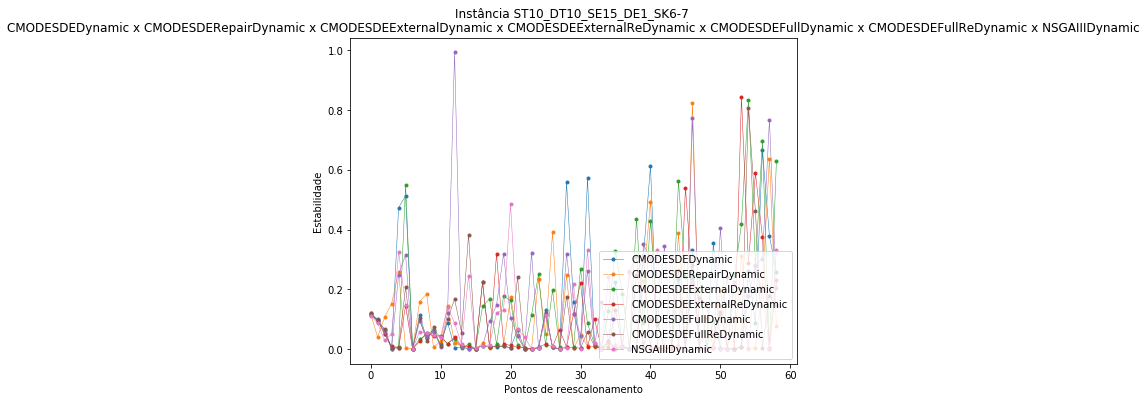

In [54]:
plot_stab(stab_event, inst, algorithms)

In [55]:
stat, p = friedmanchisquare(*datasets)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')


Statistics=123.643, p=2.796342E-24
Distribuições diferentes (rejeitar H0)


In [56]:
stat, p = friedmanchisquare(*datasetsAcc)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')

Statistics=101.194, p=1.413988E-19
Distribuições diferentes (rejeitar H0)


In [57]:
stat, p = friedmanchisquare(*datasetsStab)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')

Statistics=11.780, p=6.706295E-02
Mesmas distribuições (falhou em rejeitar H0)


In [58]:
df = pd.DataFrame({alg: hv_event[inst][alg].hypervolume for alg in algorithms})
df = df.melt(var_name="algorithm", value_name="hypervolume")
pc = sp.posthoc_conover(df, group_col="algorithm", val_col="hypervolume")
pc

CMODESDEDynamic  CMODESDEExternalDynamic  \
CMODESDEDynamic                  -1.00E+00                 9.44E-01   
CMODESDEExternalDynamic           9.44E-01                -1.00E+00   
CMODESDEExternalReDynamic         5.95E-01                 6.45E-01   
CMODESDEFullDynamic               9.22E-01                 9.78E-01   
CMODESDEFullReDynamic             8.74E-01                 9.30E-01   
CMODESDERepairDynamic             4.91E-01                 4.47E-01   
NSGAIIIDynamic                    1.90E-01                 2.15E-01   

                           CMODESDEExternalReDynamic  CMODESDEFullDynamic  \
CMODESDEDynamic                             5.95E-01             9.22E-01   
CMODESDEExternalDynamic                     6.45E-01             9.78E-01   
CMODESDEExternalReDynamic                  -1.00E+00             6.65E-01   
CMODESDEFullDynamic                         6.65E-01            -1.00E+00   
CMODESDEFullReDynamic                       7.09E-01             9.52E-01   
CMODESDERepairDynamic                       2.22E-01             4.31E-01   
NSGAIIIDynamic                              4.36E-01             2.26E-01   

                           CMODESDEFullReDynamic  CMODESDERepairDynamic  \
CMODESDEDynamic                         8.74E-01               4.91E-01   
CMODESDEExternalDynamic                 9.30E-01               4.47E-01   
CMODESDEExternalReDynamic               7.09E-01               2.22E-01   
CMODESDEFullDynamic                     9.52E-01               4.31E-01   
CMODESDEFullReDynamic                  -1.00E+00               3.97E-01   
CMODESDERepairDynamic                   3.97E-01              -1.00E+00   
NSGAIIIDynamic                          2.49E-01               4.60E-02   

                           NSGAIIIDynamic  
CMODESDEDynamic                  1.90E-01  
CMODESDEExternalDynamic          2.15E-01  
CMODESDEExternalReDynamic        4.36E-01  
CMODESDEFullDynamic              2.26E-01  
CMODESDEFullReDynamic            2.49E-01  
CMODESDERepairDynamic            4.60E-02  
NSGAIIIDynamic                  -1.00E+00

(<matplotlib.axes._subplots.AxesSubplot at 0x7fc7ac068e80>,
 <matplotlib.colorbar.ColorbarBase at 0x7fc7b2f736d8>)

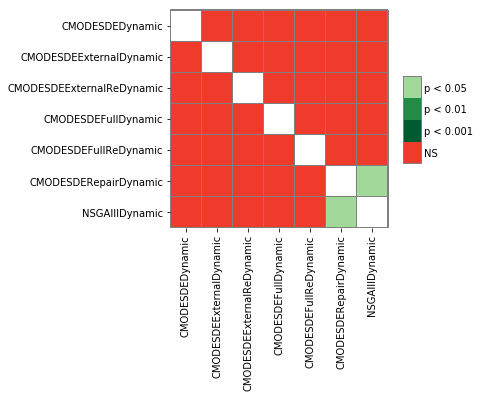

In [59]:
sp.sign_plot(pc, **heatmap_args)

### Instância ST20_DT10_SE5_DE1_SK4-5

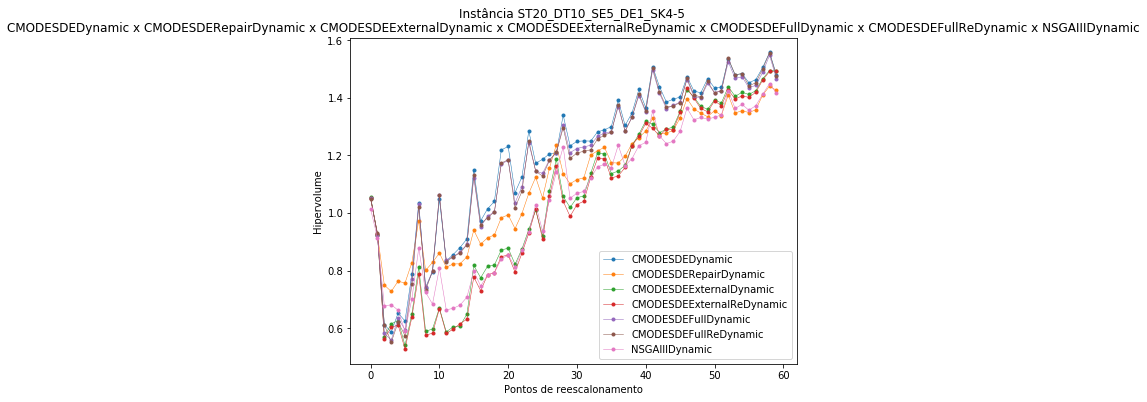

In [60]:
inst = "ST20_DT10_SE5_DE1_SK4-5"
algorithms = ["CMODESDEDynamic", "CMODESDERepairDynamic", "CMODESDEExternalDynamic", 
              "CMODESDEExternalReDynamic", "CMODESDEFullDynamic", "CMODESDEFullReDynamic", "NSGAIIIDynamic"] 

datasets = [hv_event[inst][alg].hypervolume for alg in algorithms]
datasetsAcc = [acc_event[inst][alg].accuracy for alg in algorithms]
datasetsStab = [stab_event[inst][alg].stability for alg in algorithms]

plot_hv(hv_event, inst, algorithms)


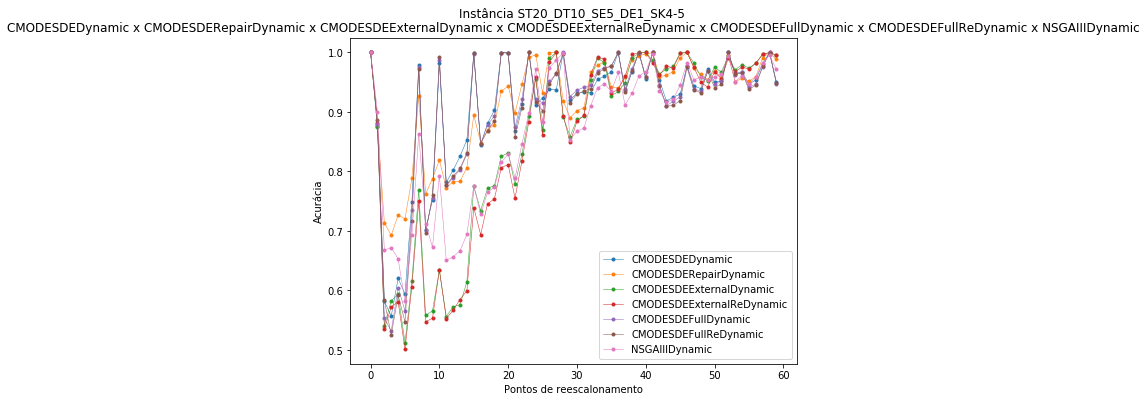

In [61]:
plot_acc(acc_event, inst, algorithms)


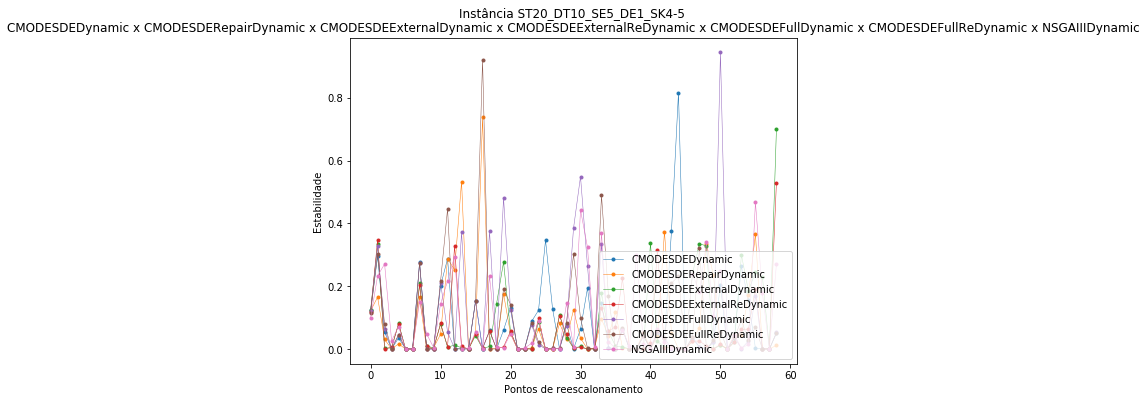

In [62]:
plot_stab(stab_event, inst, algorithms)

In [63]:
stat, p = friedmanchisquare(*datasets)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')


Statistics=222.300, p=3.363345E-45
Distribuições diferentes (rejeitar H0)


In [64]:
stat, p = friedmanchisquare(*datasetsAcc)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')

Statistics=28.038, p=9.241270E-05
Distribuições diferentes (rejeitar H0)


In [65]:
stat, p = friedmanchisquare(*datasetsStab)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')

Statistics=9.223, p=1.614427E-01
Mesmas distribuições (falhou em rejeitar H0)


In [66]:
df = pd.DataFrame({alg: hv_event[inst][alg].hypervolume for alg in algorithms})
df = df.melt(var_name="algorithm", value_name="hypervolume")
pc = sp.posthoc_conover(df, group_col="algorithm", val_col="hypervolume")
pc

CMODESDEDynamic  CMODESDEExternalDynamic  \
CMODESDEDynamic                  -1.00E+00                 4.47E-03   
CMODESDEExternalDynamic           4.47E-03                -1.00E+00   
CMODESDEExternalReDynamic         1.80E-03                 7.76E-01   
CMODESDEFullDynamic               6.47E-01                 1.68E-02   
CMODESDEFullReDynamic             6.51E-01                 1.66E-02   
CMODESDERepairDynamic             2.62E-02                 5.31E-01   
NSGAIIIDynamic                    1.59E-03                 7.48E-01   

                           CMODESDEExternalReDynamic  CMODESDEFullDynamic  \
CMODESDEDynamic                             1.80E-03             6.47E-01   
CMODESDEExternalDynamic                     7.76E-01             1.68E-02   
CMODESDEExternalReDynamic                  -1.00E+00             7.57E-03   
CMODESDEFullDynamic                         7.57E-03            -1.00E+00   
CMODESDEFullReDynamic                       7.45E-03             9.96E-01   
CMODESDERepairDynamic                       3.63E-01             7.69E-02   
NSGAIIIDynamic                              9.71E-01             6.79E-03   

                           CMODESDEFullReDynamic  CMODESDERepairDynamic  \
CMODESDEDynamic                         6.51E-01               2.62E-02   
CMODESDEExternalDynamic                 1.66E-02               5.31E-01   
CMODESDEExternalReDynamic               7.45E-03               3.63E-01   
CMODESDEFullDynamic                     9.96E-01               7.69E-02   
CMODESDEFullReDynamic                  -1.00E+00               7.60E-02   
CMODESDERepairDynamic                   7.60E-02              -1.00E+00   
NSGAIIIDynamic                          6.68E-03               3.44E-01   

                           NSGAIIIDynamic  
CMODESDEDynamic                  1.59E-03  
CMODESDEExternalDynamic          7.48E-01  
CMODESDEExternalReDynamic        9.71E-01  
CMODESDEFullDynamic              6.79E-03  
CMODESDEFullReDynamic            6.68E-03  
CMODESDERepairDynamic            3.44E-01  
NSGAIIIDynamic                  -1.00E+00

(<matplotlib.axes._subplots.AxesSubplot at 0x7fc7b298da58>,
 <matplotlib.colorbar.ColorbarBase at 0x7fc7b29174a8>)

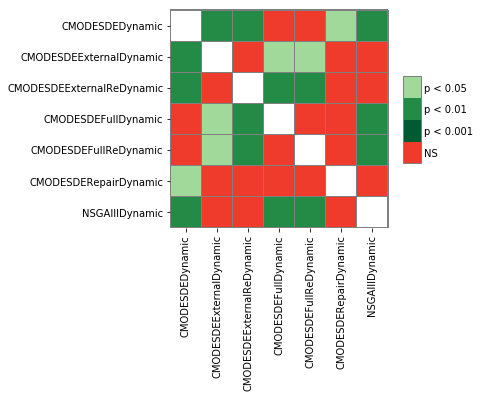

In [67]:
sp.sign_plot(pc, **heatmap_args)

### Instância ST20_DT10_SE10_DE1_SK4-5

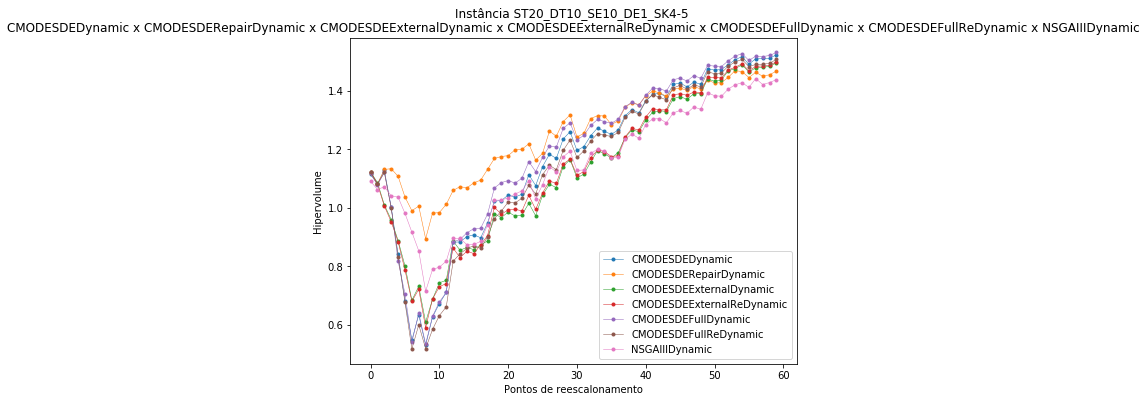

In [68]:
inst = "ST20_DT10_SE10_DE1_SK4-5"
algorithms = ["CMODESDEDynamic", "CMODESDERepairDynamic", "CMODESDEExternalDynamic", 
              "CMODESDEExternalReDynamic", "CMODESDEFullDynamic", "CMODESDEFullReDynamic", "NSGAIIIDynamic"]

datasets = [hv_event[inst][alg].hypervolume for alg in algorithms]
datasetsAcc = [acc_event[inst][alg].accuracy for alg in algorithms]
datasetsStab = [stab_event[inst][alg].stability for alg in algorithms]

plot_hv(hv_event, inst, algorithms)


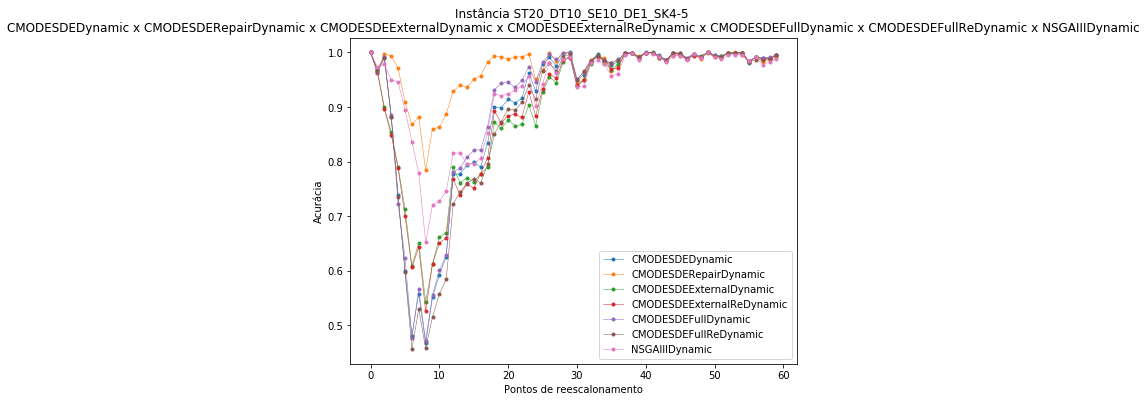

In [69]:
plot_acc(acc_event, inst, algorithms)


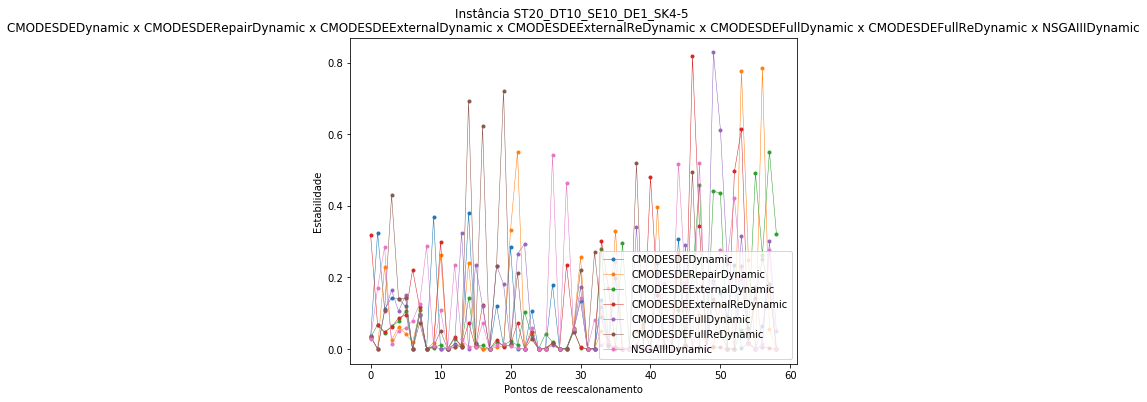

In [70]:
plot_stab(stab_event, inst, algorithms)

In [71]:
stat, p = friedmanchisquare(*datasets)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')


Statistics=139.143, p=1.519944E-27
Distribuições diferentes (rejeitar H0)


In [72]:
stat, p = friedmanchisquare(*datasetsAcc)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')

Statistics=55.233, p=4.158701E-10
Distribuições diferentes (rejeitar H0)


In [73]:
stat, p = friedmanchisquare(*datasetsStab)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')

Statistics=4.248, p=6.431027E-01
Mesmas distribuições (falhou em rejeitar H0)


In [74]:
df = pd.DataFrame({alg: hv_event[inst][alg].hypervolume for alg in algorithms})
df = df.melt(var_name="algorithm", value_name="hypervolume")
pc = sp.posthoc_conover(df, group_col="algorithm", val_col="hypervolume")
pc

CMODESDEDynamic  CMODESDEExternalDynamic  \
CMODESDEDynamic                  -1.00E+00                 2.31E-01   
CMODESDEExternalDynamic           2.31E-01                -1.00E+00   
CMODESDEExternalReDynamic         3.02E-01                 8.69E-01   
CMODESDEFullDynamic               6.03E-01                 8.62E-02   
CMODESDEFullReDynamic             6.56E-01                 4.52E-01   
CMODESDERepairDynamic             1.93E-01                 1.27E-02   
NSGAIIIDynamic                    2.56E-01                 9.51E-01   

                           CMODESDEExternalReDynamic  CMODESDEFullDynamic  \
CMODESDEDynamic                             3.02E-01             6.03E-01   
CMODESDEExternalDynamic                     8.69E-01             8.62E-02   
CMODESDEExternalReDynamic                  -1.00E+00             1.21E-01   
CMODESDEFullDynamic                         1.21E-01            -1.00E+00   
CMODESDEFullReDynamic                       5.57E-01             3.34E-01   
CMODESDERepairDynamic                       1.98E-02             4.34E-01   
NSGAIIIDynamic                              9.18E-01             9.79E-02   

                           CMODESDEFullReDynamic  CMODESDERepairDynamic  \
CMODESDEDynamic                         6.56E-01               1.93E-01   
CMODESDEExternalDynamic                 4.52E-01               1.27E-02   
CMODESDEExternalReDynamic               5.57E-01               1.98E-02   
CMODESDEFullDynamic                     3.34E-01               4.34E-01   
CMODESDEFullReDynamic                  -1.00E+00               8.07E-02   
CMODESDERepairDynamic                   8.07E-02              -1.00E+00   
NSGAIIIDynamic                          4.90E-01               1.50E-02   

                           NSGAIIIDynamic  
CMODESDEDynamic                  2.56E-01  
CMODESDEExternalDynamic          9.51E-01  
CMODESDEExternalReDynamic        9.18E-01  
CMODESDEFullDynamic              9.79E-02  
CMODESDEFullReDynamic            4.90E-01  
CMODESDERepairDynamic            1.50E-02  
NSGAIIIDynamic                  -1.00E+00

(<matplotlib.axes._subplots.AxesSubplot at 0x7fc7a00579e8>,
 <matplotlib.colorbar.ColorbarBase at 0x7fc79ffdcd30>)

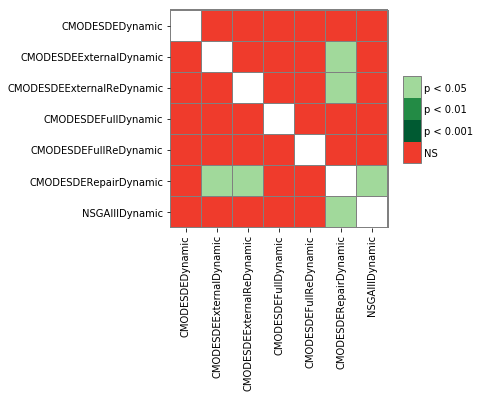

In [75]:
sp.sign_plot(pc, **heatmap_args)

### Instância ST20_DT10_SE15_DE1_SK4-5

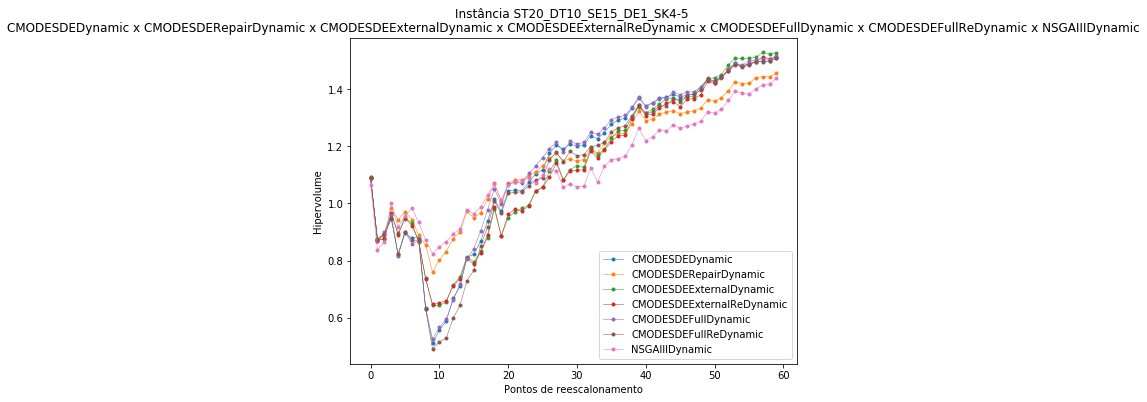

In [76]:
inst = "ST20_DT10_SE15_DE1_SK4-5"
algorithms = ["CMODESDEDynamic", "CMODESDERepairDynamic", "CMODESDEExternalDynamic", 
              "CMODESDEExternalReDynamic", "CMODESDEFullDynamic", "CMODESDEFullReDynamic", "NSGAIIIDynamic"]

datasets = [hv_event[inst][alg].hypervolume for alg in algorithms]
datasetsAcc = [acc_event[inst][alg].accuracy for alg in algorithms]
datasetsStab = [stab_event[inst][alg].stability for alg in algorithms]

plot_hv(hv_event, inst, algorithms)


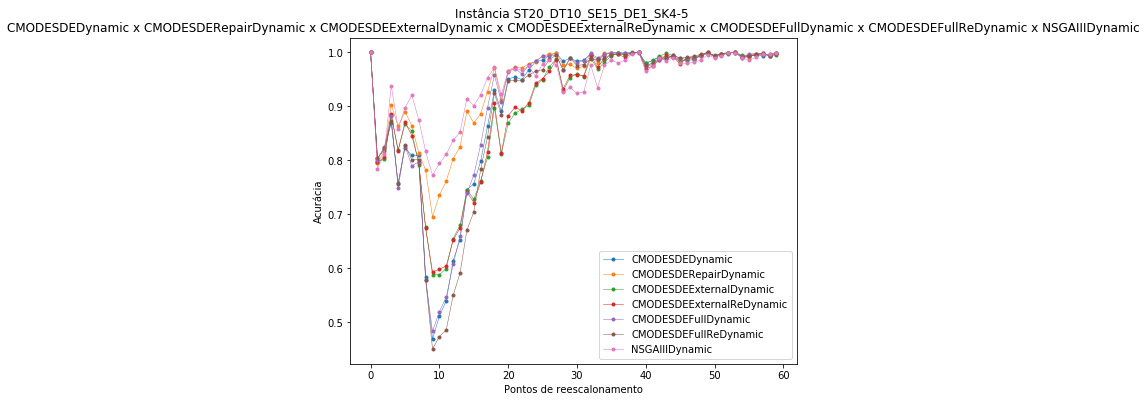

In [77]:
plot_acc(acc_event, inst, algorithms)


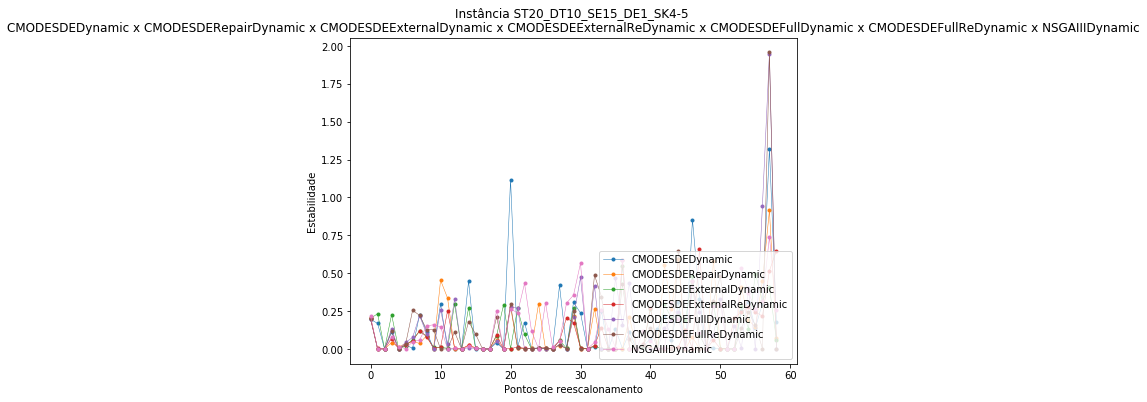

In [78]:
plot_stab(stab_event, inst, algorithms)

In [79]:
stat, p = friedmanchisquare(*datasets)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')


Statistics=54.164, p=6.835270E-10
Distribuições diferentes (rejeitar H0)


In [80]:
stat, p = friedmanchisquare(*datasetsAcc)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')

Statistics=35.240, p=3.872358E-06
Distribuições diferentes (rejeitar H0)


In [81]:
stat, p = friedmanchisquare(*datasetsStab)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')

Statistics=12.581, p=5.019224E-02
Mesmas distribuições (falhou em rejeitar H0)


In [82]:
df = pd.DataFrame({alg: hv_event[inst][alg].hypervolume for alg in algorithms})
df = df.melt(var_name="algorithm", value_name="hypervolume")
pc = sp.posthoc_conover(df, group_col="algorithm", val_col="hypervolume")
pc

CMODESDEDynamic  CMODESDEExternalDynamic  \
CMODESDEDynamic                  -1.00E+00                 6.77E-01   
CMODESDEExternalDynamic           6.77E-01                -1.00E+00   
CMODESDEExternalReDynamic         5.34E-01                 8.37E-01   
CMODESDEFullDynamic               8.23E-01                 5.22E-01   
CMODESDEFullReDynamic             7.25E-01                 9.49E-01   
CMODESDERepairDynamic             8.09E-01                 8.61E-01   
NSGAIIIDynamic                    3.01E-01                 5.36E-01   

                           CMODESDEExternalReDynamic  CMODESDEFullDynamic  \
CMODESDEDynamic                             5.34E-01             8.23E-01   
CMODESDEExternalDynamic                     8.37E-01             5.22E-01   
CMODESDEExternalReDynamic                  -1.00E+00             3.98E-01   
CMODESDEFullDynamic                         3.98E-01            -1.00E+00   
CMODESDEFullReDynamic                       7.87E-01             5.65E-01   
CMODESDERepairDynamic                       7.03E-01             6.42E-01   
NSGAIIIDynamic                              6.79E-01             2.08E-01   

                           CMODESDEFullReDynamic  CMODESDERepairDynamic  \
CMODESDEDynamic                         7.25E-01               8.09E-01   
CMODESDEExternalDynamic                 9.49E-01               8.61E-01   
CMODESDEExternalReDynamic               7.87E-01               7.03E-01   
CMODESDEFullDynamic                     5.65E-01               6.42E-01   
CMODESDEFullReDynamic                  -1.00E+00               9.12E-01   
CMODESDERepairDynamic                   9.12E-01              -1.00E+00   
NSGAIIIDynamic                          4.94E-01               4.27E-01   

                           NSGAIIIDynamic  
CMODESDEDynamic                  3.01E-01  
CMODESDEExternalDynamic          5.36E-01  
CMODESDEExternalReDynamic        6.79E-01  
CMODESDEFullDynamic              2.08E-01  
CMODESDEFullReDynamic            4.94E-01  
CMODESDERepairDynamic            4.27E-01  
NSGAIIIDynamic                  -1.00E+00

(<matplotlib.axes._subplots.AxesSubplot at 0x7fc7ac2091d0>,
 <matplotlib.colorbar.ColorbarBase at 0x7fc7b190d6d8>)

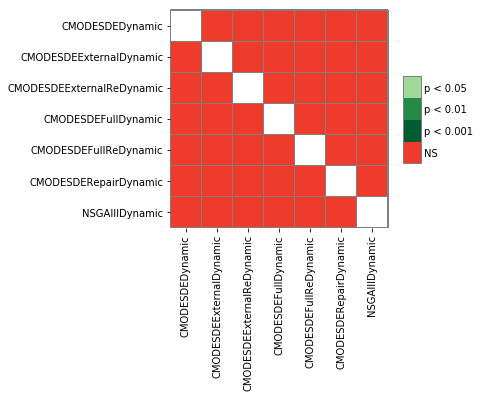

In [83]:
sp.sign_plot(pc, **heatmap_args)

### Instância ST20_DT10_SE5_DE1_SK6-7

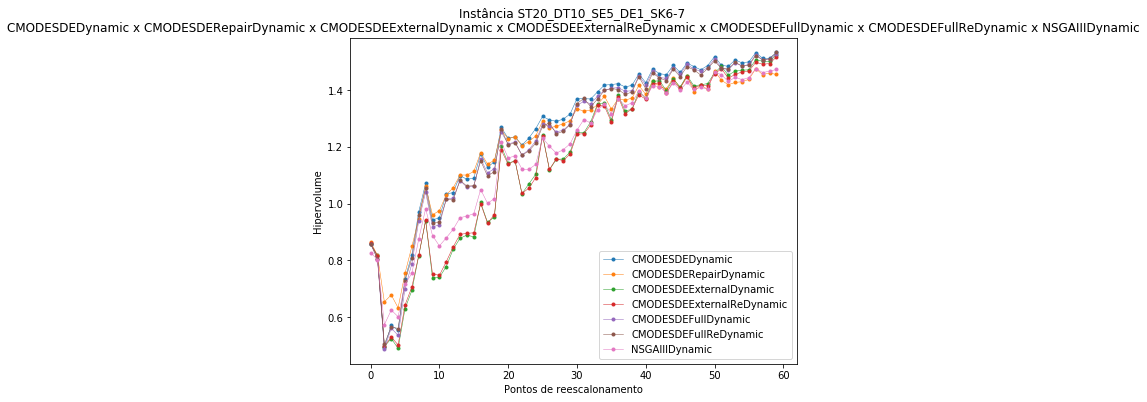

In [84]:
inst = "ST20_DT10_SE5_DE1_SK6-7"
algorithms = ["CMODESDEDynamic", "CMODESDERepairDynamic", "CMODESDEExternalDynamic", 
              "CMODESDEExternalReDynamic", "CMODESDEFullDynamic", "CMODESDEFullReDynamic", "NSGAIIIDynamic"] 

datasets = [hv_event[inst][alg].hypervolume for alg in algorithms]
datasetsAcc = [acc_event[inst][alg].accuracy for alg in algorithms]
datasetsStab = [stab_event[inst][alg].stability for alg in algorithms]

plot_hv(hv_event, inst, algorithms)


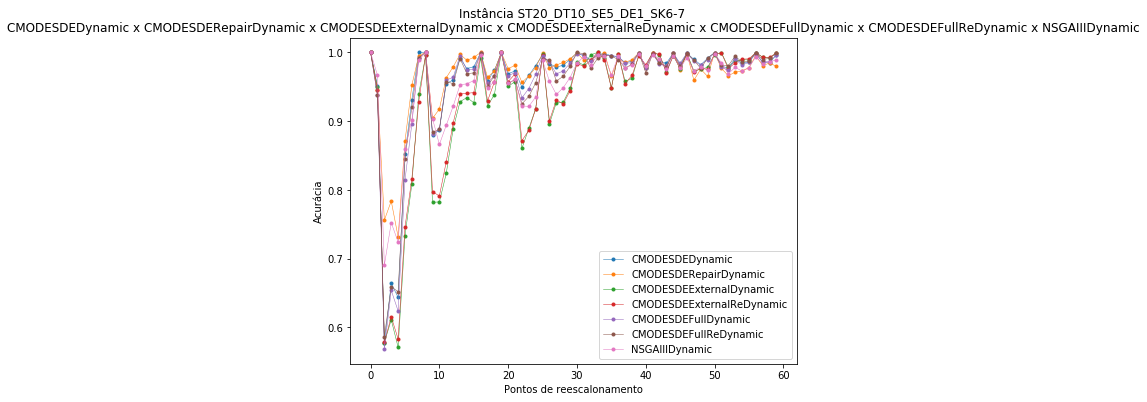

In [85]:
plot_acc(acc_event, inst, algorithms)


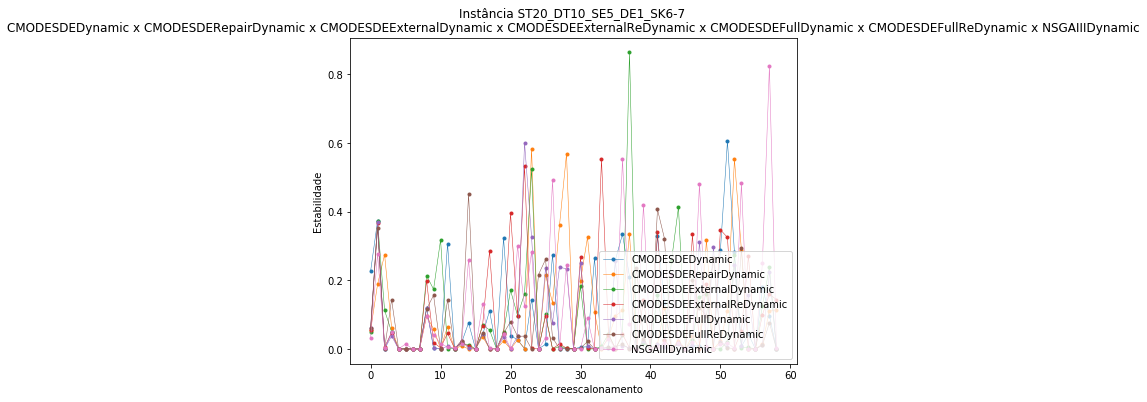

In [86]:
plot_stab(stab_event, inst, algorithms)

In [87]:
stat, p = friedmanchisquare(*datasets)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')


Statistics=215.536, p=9.311554E-44
Distribuições diferentes (rejeitar H0)


In [88]:
stat, p = friedmanchisquare(*datasetsAcc)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')

Statistics=57.203, p=1.661810E-10
Distribuições diferentes (rejeitar H0)


In [89]:
stat, p = friedmanchisquare(*datasetsStab)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')

Statistics=9.892, p=1.292791E-01
Mesmas distribuições (falhou em rejeitar H0)


In [90]:
df = pd.DataFrame({alg: hv_event[inst][alg].hypervolume for alg in algorithms})
df = df.melt(var_name="algorithm", value_name="hypervolume")
pc = sp.posthoc_conover(df, group_col="algorithm", val_col="hypervolume")
pc

CMODESDEDynamic  CMODESDEExternalDynamic  \
CMODESDEDynamic                  -1.00E+00                 3.39E-02   
CMODESDEExternalDynamic           3.39E-02                -1.00E+00   
CMODESDEExternalReDynamic         2.37E-02                 8.88E-01   
CMODESDEFullDynamic               6.32E-01                 9.98E-02   
CMODESDEFullReDynamic             5.73E-01                 1.19E-01   
CMODESDERepairDynamic             1.76E-01                 4.41E-01   
NSGAIIIDynamic                    3.24E-02                 9.86E-01   

                           CMODESDEExternalReDynamic  CMODESDEFullDynamic  \
CMODESDEDynamic                             2.37E-02             6.32E-01   
CMODESDEExternalDynamic                     8.88E-01             9.98E-02   
CMODESDEExternalReDynamic                  -1.00E+00             7.40E-02   
CMODESDEFullDynamic                         7.40E-02            -1.00E+00   
CMODESDEFullReDynamic                       8.90E-02             9.31E-01   
CMODESDERepairDynamic                       3.62E-01             3.81E-01   
NSGAIIIDynamic                              9.02E-01             9.61E-02   

                           CMODESDEFullReDynamic  CMODESDERepairDynamic  \
CMODESDEDynamic                         5.73E-01               1.76E-01   
CMODESDEExternalDynamic                 1.19E-01               4.41E-01   
CMODESDEExternalReDynamic               8.90E-02               3.62E-01   
CMODESDEFullDynamic                     9.31E-01               3.81E-01   
CMODESDEFullReDynamic                  -1.00E+00               4.29E-01   
CMODESDERepairDynamic                   4.29E-01              -1.00E+00   
NSGAIIIDynamic                          1.14E-01               4.30E-01   

                           NSGAIIIDynamic  
CMODESDEDynamic                  3.24E-02  
CMODESDEExternalDynamic          9.86E-01  
CMODESDEExternalReDynamic        9.02E-01  
CMODESDEFullDynamic              9.61E-02  
CMODESDEFullReDynamic            1.14E-01  
CMODESDERepairDynamic            4.30E-01  
NSGAIIIDynamic                  -1.00E+00

(<matplotlib.axes._subplots.AxesSubplot at 0x7fc7ac0e1828>,
 <matplotlib.colorbar.ColorbarBase at 0x7fc7a0128940>)

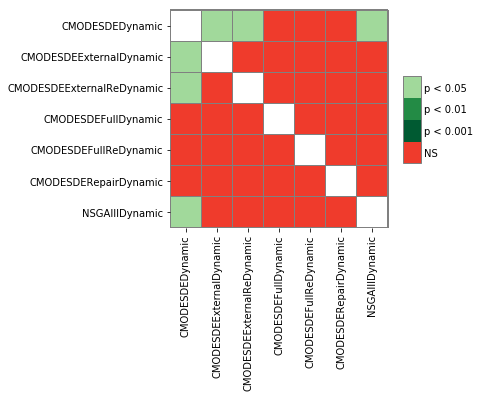

In [91]:
sp.sign_plot(pc, **heatmap_args)

### Instância ST20_DT10_SE10_DE1_SK6-7

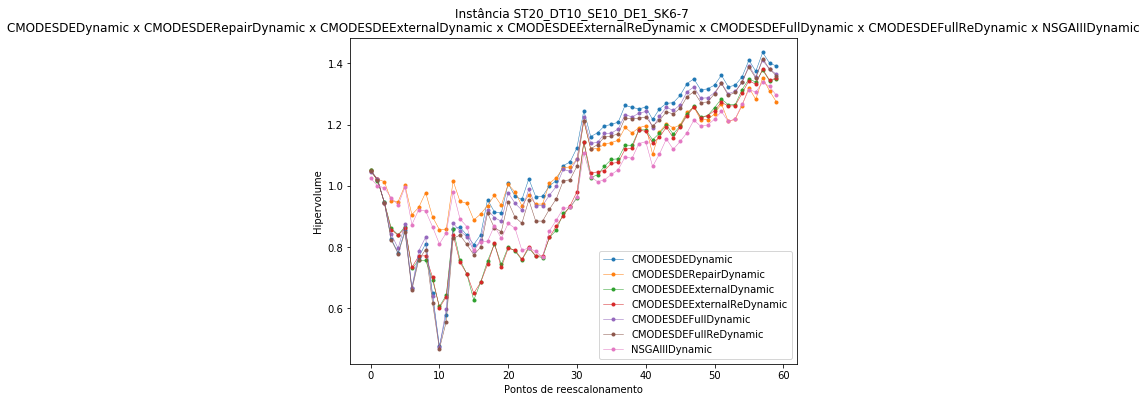

In [92]:
inst = "ST20_DT10_SE10_DE1_SK6-7"
algorithms = ["CMODESDEDynamic", "CMODESDERepairDynamic", "CMODESDEExternalDynamic", 
              "CMODESDEExternalReDynamic", "CMODESDEFullDynamic", "CMODESDEFullReDynamic", "NSGAIIIDynamic"]

datasets = [hv_event[inst][alg].hypervolume for alg in algorithms]
datasetsAcc = [acc_event[inst][alg].accuracy for alg in algorithms]
datasetsStab = [stab_event[inst][alg].stability for alg in algorithms]

plot_hv(hv_event, inst, algorithms)


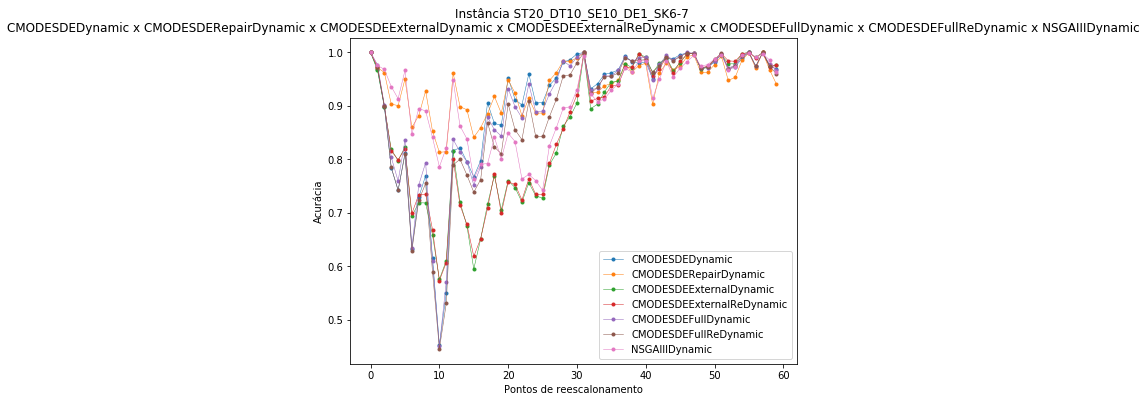

In [93]:
plot_acc(acc_event, inst, algorithms)


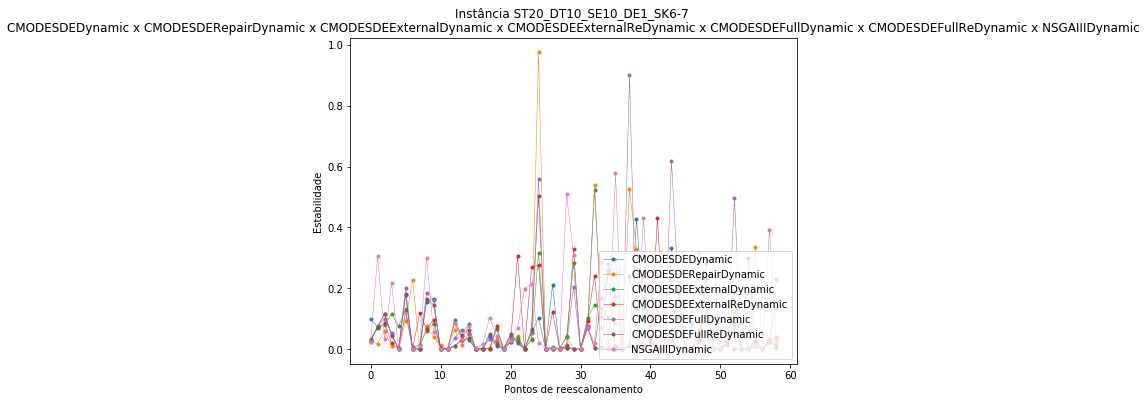

In [94]:
plot_stab(stab_event, inst, algorithms)

In [95]:
stat, p = friedmanchisquare(*datasets)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')


Statistics=136.750, p=4.859382E-27
Distribuições diferentes (rejeitar H0)


In [96]:
stat, p = friedmanchisquare(*datasetsAcc)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')

Statistics=30.766, p=2.810021E-05
Distribuições diferentes (rejeitar H0)


In [97]:
stat, p = friedmanchisquare(*datasetsStab)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')

Statistics=9.643, p=1.405170E-01
Mesmas distribuições (falhou em rejeitar H0)


In [98]:
df = pd.DataFrame({alg: hv_event[inst][alg].hypervolume for alg in algorithms})
df = df.melt(var_name="algorithm", value_name="hypervolume")
pc = sp.posthoc_conover(df, group_col="algorithm", val_col="hypervolume")
pc

CMODESDEDynamic  CMODESDEExternalDynamic  \
CMODESDEDynamic                  -1.00E+00                 1.31E-02   
CMODESDEExternalDynamic           1.31E-02                -1.00E+00   
CMODESDEExternalReDynamic         1.14E-02                 9.61E-01   
CMODESDEFullDynamic               6.23E-01                 4.61E-02   
CMODESDEFullReDynamic             3.31E-01                 1.29E-01   
CMODESDERepairDynamic             7.63E-01                 2.90E-02   
NSGAIIIDynamic                    4.11E-02                 6.58E-01   

                           CMODESDEExternalReDynamic  CMODESDEFullDynamic  \
CMODESDEDynamic                             1.14E-02             6.23E-01   
CMODESDEExternalDynamic                     9.61E-01             4.61E-02   
CMODESDEExternalReDynamic                  -1.00E+00             4.11E-02   
CMODESDEFullDynamic                         4.11E-02            -1.00E+00   
CMODESDEFullReDynamic                       1.18E-01             6.31E-01   
CMODESDERepairDynamic                       2.57E-02             8.49E-01   
NSGAIIIDynamic                              6.23E-01             1.20E-01   

                           CMODESDEFullReDynamic  CMODESDERepairDynamic  \
CMODESDEDynamic                         3.31E-01               7.63E-01   
CMODESDEExternalDynamic                 1.29E-01               2.90E-02   
CMODESDEExternalReDynamic               1.18E-01               2.57E-02   
CMODESDEFullDynamic                     6.31E-01               8.49E-01   
CMODESDEFullReDynamic                  -1.00E+00               5.03E-01   
CMODESDERepairDynamic                   5.03E-01              -1.00E+00   
NSGAIIIDynamic                          2.82E-01               8.13E-02   

                           NSGAIIIDynamic  
CMODESDEDynamic                  4.11E-02  
CMODESDEExternalDynamic          6.58E-01  
CMODESDEExternalReDynamic        6.23E-01  
CMODESDEFullDynamic              1.20E-01  
CMODESDEFullReDynamic            2.82E-01  
CMODESDERepairDynamic            8.13E-02  
NSGAIIIDynamic                  -1.00E+00

(<matplotlib.axes._subplots.AxesSubplot at 0x7fc79fe486a0>,
 <matplotlib.colorbar.ColorbarBase at 0x7fc79fdc9198>)

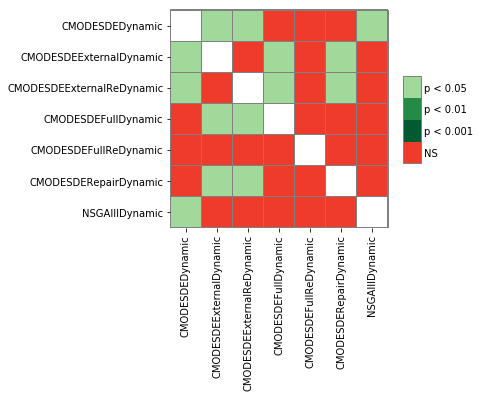

In [99]:
sp.sign_plot(pc, **heatmap_args)

### Instância ST20_DT10_SE15_DE1_SK6-7

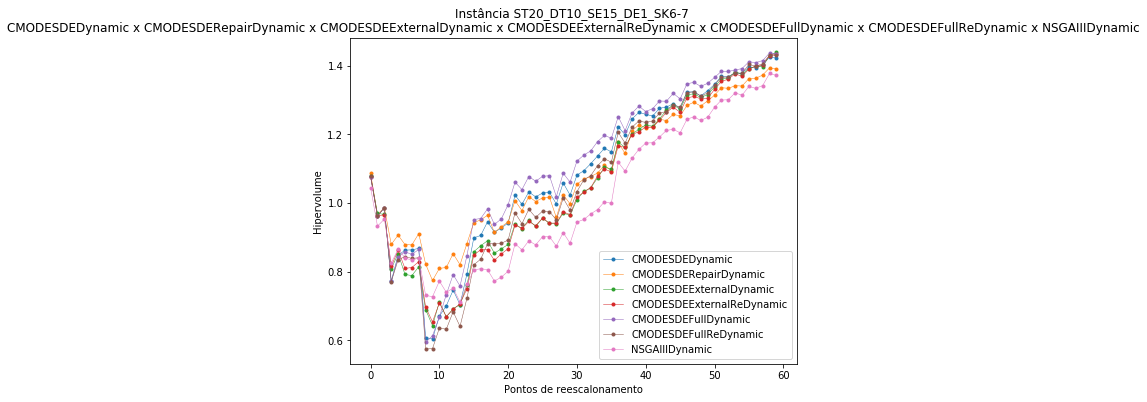

In [100]:
inst = "ST20_DT10_SE15_DE1_SK6-7"
algorithms = ["CMODESDEDynamic", "CMODESDERepairDynamic", "CMODESDEExternalDynamic", 
              "CMODESDEExternalReDynamic", "CMODESDEFullDynamic", "CMODESDEFullReDynamic", "NSGAIIIDynamic"]  

datasets = [hv_event[inst][alg].hypervolume for alg in algorithms]
datasetsAcc = [acc_event[inst][alg].accuracy for alg in algorithms]
datasetsStab = [stab_event[inst][alg].stability for alg in algorithms]

plot_hv(hv_event, inst, algorithms)


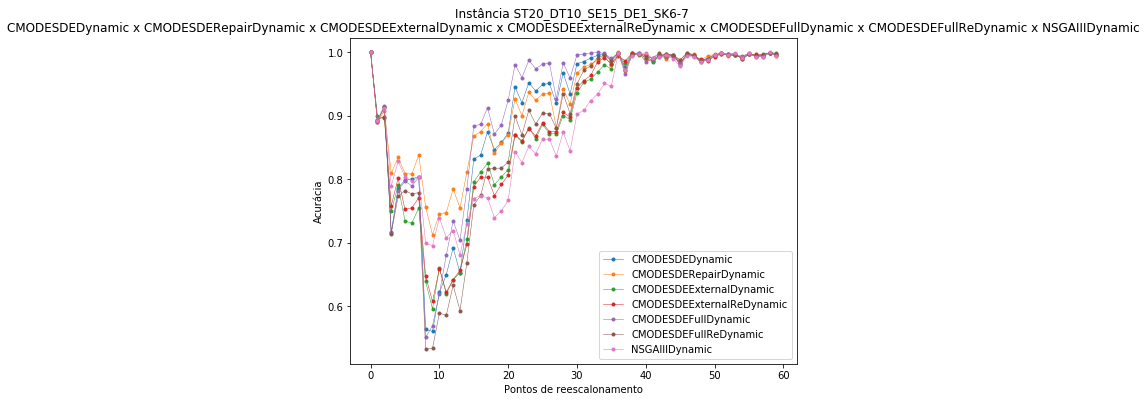

In [101]:
plot_acc(acc_event, inst, algorithms)


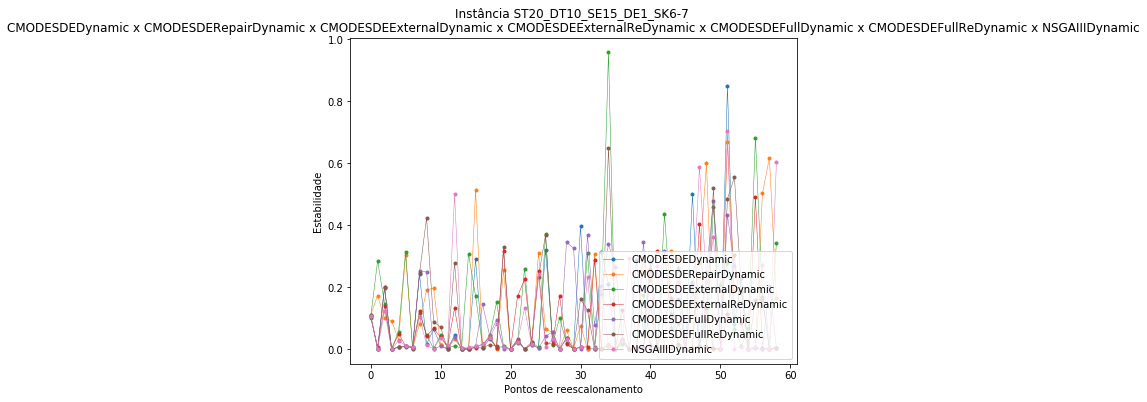

In [102]:
plot_stab(stab_event, inst, algorithms)

In [103]:
stat, p = friedmanchisquare(*datasets)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')


Statistics=163.479, p=1.085266E-32
Distribuições diferentes (rejeitar H0)


In [104]:
stat, p = friedmanchisquare(*datasetsAcc)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')

Statistics=63.930, p=7.133406E-12
Distribuições diferentes (rejeitar H0)


In [105]:
stat, p = friedmanchisquare(*datasetsStab)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')

Statistics=6.664, p=3.530686E-01
Mesmas distribuições (falhou em rejeitar H0)


In [106]:
df = pd.DataFrame({alg: hv_event[inst][alg].hypervolume for alg in algorithms})
df = df.melt(var_name="algorithm", value_name="hypervolume")
pc = sp.posthoc_conover(df, group_col="algorithm", val_col="hypervolume")
pc

CMODESDEDynamic  CMODESDEExternalDynamic  \
CMODESDEDynamic                  -1.00E+00                 3.86E-01   
CMODESDEExternalDynamic           3.86E-01                -1.00E+00   
CMODESDEExternalReDynamic         3.36E-01                 9.24E-01   
CMODESDEFullDynamic               5.72E-01                 1.53E-01   
CMODESDEFullReDynamic             5.47E-01                 7.92E-01   
CMODESDERepairDynamic             8.85E-01                 4.71E-01   
NSGAIIIDynamic                    3.43E-02                 2.10E-01   

                           CMODESDEExternalReDynamic  CMODESDEFullDynamic  \
CMODESDEDynamic                             3.36E-01             5.72E-01   
CMODESDEExternalDynamic                     9.24E-01             1.53E-01   
CMODESDEExternalReDynamic                  -1.00E+00             1.27E-01   
CMODESDEFullDynamic                         1.27E-01            -1.00E+00   
CMODESDEFullReDynamic                       7.19E-01             2.43E-01   
CMODESDERepairDynamic                       4.14E-01             4.78E-01   
NSGAIIIDynamic                              2.46E-01             7.46E-03   

                           CMODESDEFullReDynamic  CMODESDERepairDynamic  \
CMODESDEDynamic                         5.47E-01               8.85E-01   
CMODESDEExternalDynamic                 7.92E-01               4.71E-01   
CMODESDEExternalReDynamic               7.19E-01               4.14E-01   
CMODESDEFullDynamic                     2.43E-01               4.78E-01   
CMODESDEFullReDynamic                  -1.00E+00               6.47E-01   
CMODESDERepairDynamic                   6.47E-01              -1.00E+00   
NSGAIIIDynamic                          1.29E-01               4.85E-02   

                           NSGAIIIDynamic  
CMODESDEDynamic                  3.43E-02  
CMODESDEExternalDynamic          2.10E-01  
CMODESDEExternalReDynamic        2.46E-01  
CMODESDEFullDynamic              7.46E-03  
CMODESDEFullReDynamic            1.29E-01  
CMODESDERepairDynamic            4.85E-02  
NSGAIIIDynamic                  -1.00E+00

(<matplotlib.axes._subplots.AxesSubplot at 0x7fc7ac2f1748>,
 <matplotlib.colorbar.ColorbarBase at 0x7fc7b13ec5c0>)

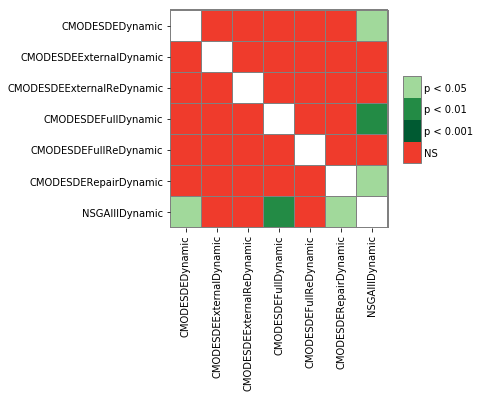

In [107]:
sp.sign_plot(pc, **heatmap_args)

### Instância ST30_DT10_SE5_DE1_SK4-5

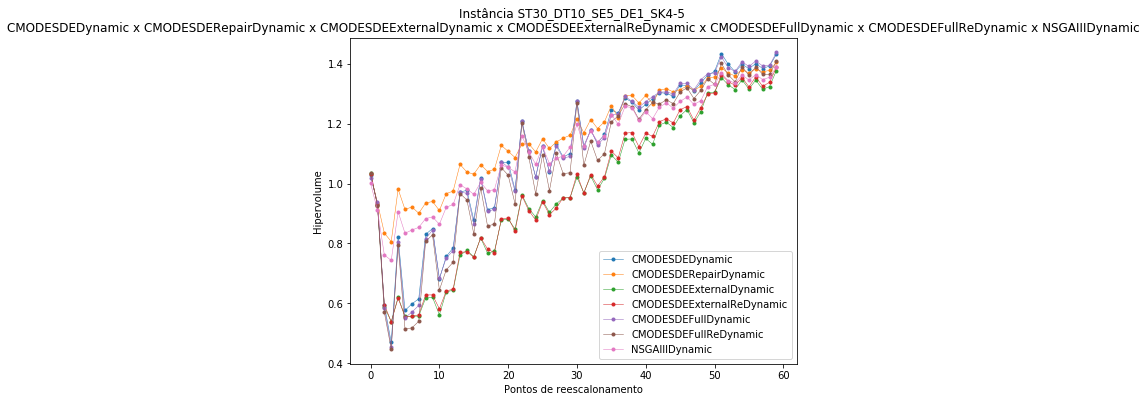

In [108]:
inst = "ST30_DT10_SE5_DE1_SK4-5"
algorithms = ["CMODESDEDynamic", "CMODESDERepairDynamic", "CMODESDEExternalDynamic", 
              "CMODESDEExternalReDynamic", "CMODESDEFullDynamic", "CMODESDEFullReDynamic", "NSGAIIIDynamic"]

datasets = [hv_event[inst][alg].hypervolume for alg in algorithms]
datasetsAcc = [acc_event[inst][alg].accuracy for alg in algorithms]
datasetsStab = [stab_event[inst][alg].stability for alg in algorithms]

plot_hv(hv_event, inst, algorithms)


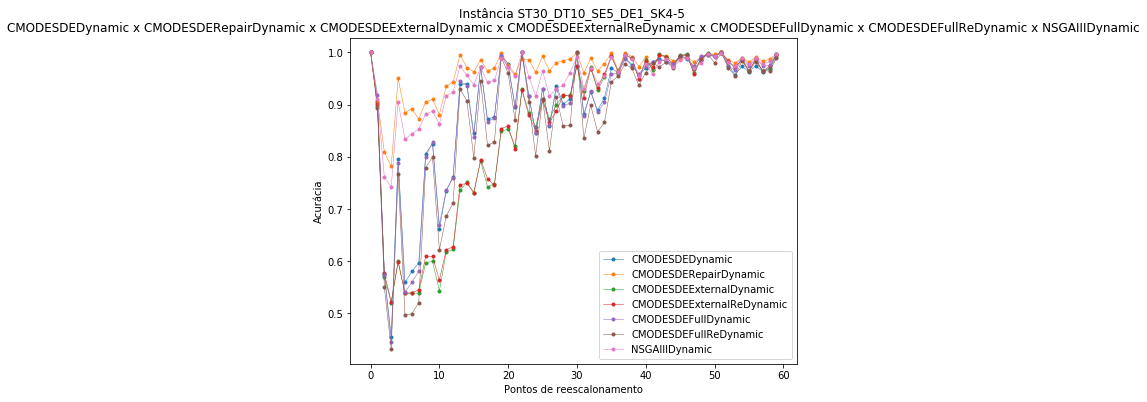

In [109]:
plot_acc(acc_event, inst, algorithms)


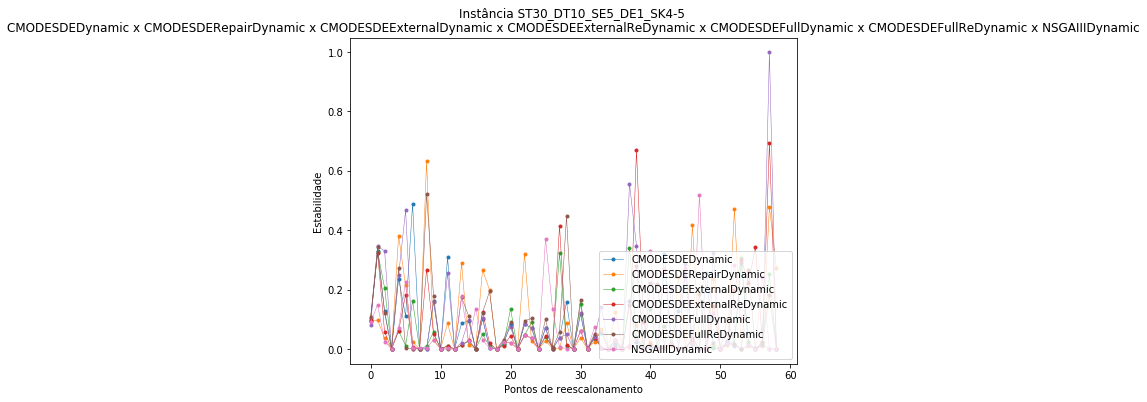

In [110]:
plot_stab(stab_event, inst, algorithms)

In [111]:
stat, p = friedmanchisquare(*datasets)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')


Statistics=239.250, p=8.117029E-49
Distribuições diferentes (rejeitar H0)


In [112]:
stat, p = friedmanchisquare(*datasetsAcc)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')

Statistics=138.945, p=1.673558E-27
Distribuições diferentes (rejeitar H0)


In [113]:
stat, p = friedmanchisquare(*datasetsStab)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')

Statistics=3.733, p=7.127709E-01
Mesmas distribuições (falhou em rejeitar H0)


In [114]:
df = pd.DataFrame({alg: hv_event[inst][alg].hypervolume for alg in algorithms})
df = df.melt(var_name="algorithm", value_name="hypervolume")
pc = sp.posthoc_conover(df, group_col="algorithm", val_col="hypervolume")
pc

CMODESDEDynamic  CMODESDEExternalDynamic  \
CMODESDEDynamic                  -1.00E+00                 4.08E-03   
CMODESDEExternalDynamic           4.08E-03                -1.00E+00   
CMODESDEExternalReDynamic         6.94E-03                 8.61E-01   
CMODESDEFullDynamic               9.83E-01                 4.36E-03   
CMODESDEFullReDynamic             4.42E-01                 3.47E-02   
CMODESDERepairDynamic             3.16E-01                 1.16E-04   
NSGAIIIDynamic                    8.35E-01                 7.67E-03   

                           CMODESDEExternalReDynamic  CMODESDEFullDynamic  \
CMODESDEDynamic                             6.94E-03             9.83E-01   
CMODESDEExternalDynamic                     8.61E-01             4.36E-03   
CMODESDEExternalReDynamic                  -1.00E+00             7.39E-03   
CMODESDEFullDynamic                         7.39E-03            -1.00E+00   
CMODESDEFullReDynamic                       5.26E-02             4.55E-01   
CMODESDERepairDynamic                       2.29E-04             3.06E-01   
NSGAIIIDynamic                              1.26E-02             8.52E-01   

                           CMODESDEFullReDynamic  CMODESDERepairDynamic  \
CMODESDEDynamic                         4.42E-01               3.16E-01   
CMODESDEExternalDynamic                 3.47E-02               1.16E-04   
CMODESDEExternalReDynamic               5.26E-02               2.29E-04   
CMODESDEFullDynamic                     4.55E-01               3.06E-01   
CMODESDEFullReDynamic                  -1.00E+00               7.68E-02   
CMODESDERepairDynamic                   7.68E-02              -1.00E+00   
NSGAIIIDynamic                          5.75E-01               2.26E-01   

                           NSGAIIIDynamic  
CMODESDEDynamic                  8.35E-01  
CMODESDEExternalDynamic          7.67E-03  
CMODESDEExternalReDynamic        1.26E-02  
CMODESDEFullDynamic              8.52E-01  
CMODESDEFullReDynamic            5.75E-01  
CMODESDERepairDynamic            2.26E-01  
NSGAIIIDynamic                  -1.00E+00

(<matplotlib.axes._subplots.AxesSubplot at 0x7fc79ff53cc0>,
 <matplotlib.colorbar.ColorbarBase at 0x7fc79ff07eb8>)

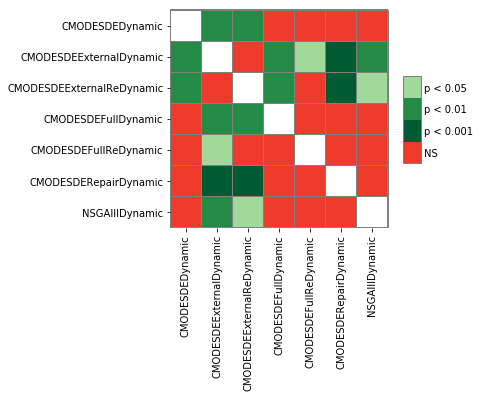

In [115]:
sp.sign_plot(pc, **heatmap_args)

### Instância ST30_DT10_SE10_DE1_SK4-5

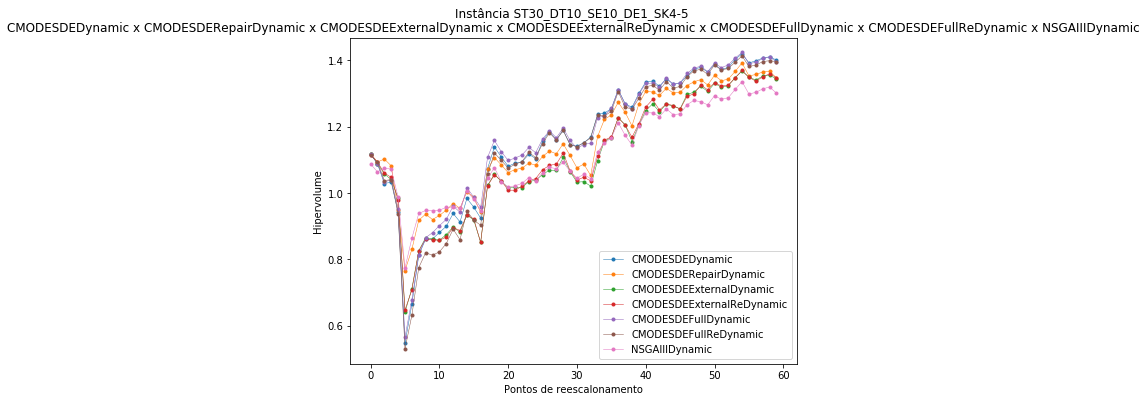

In [116]:
inst = "ST30_DT10_SE10_DE1_SK4-5"
algorithms = ["CMODESDEDynamic", "CMODESDERepairDynamic", "CMODESDEExternalDynamic", 
              "CMODESDEExternalReDynamic", "CMODESDEFullDynamic", "CMODESDEFullReDynamic", "NSGAIIIDynamic"]

datasets = [hv_event[inst][alg].hypervolume for alg in algorithms]
datasetsAcc = [acc_event[inst][alg].accuracy for alg in algorithms]
datasetsStab = [stab_event[inst][alg].stability for alg in algorithms]

plot_hv(hv_event, inst, algorithms)


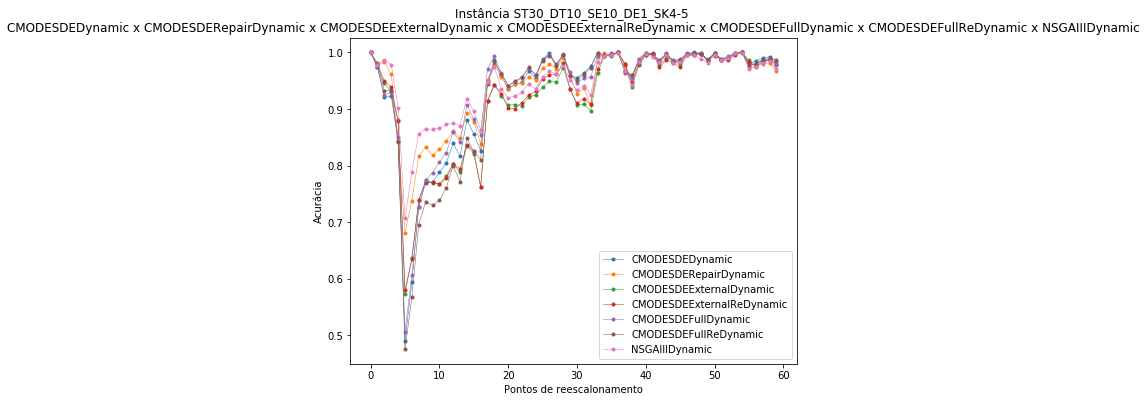

In [117]:
plot_acc(acc_event, inst, algorithms)


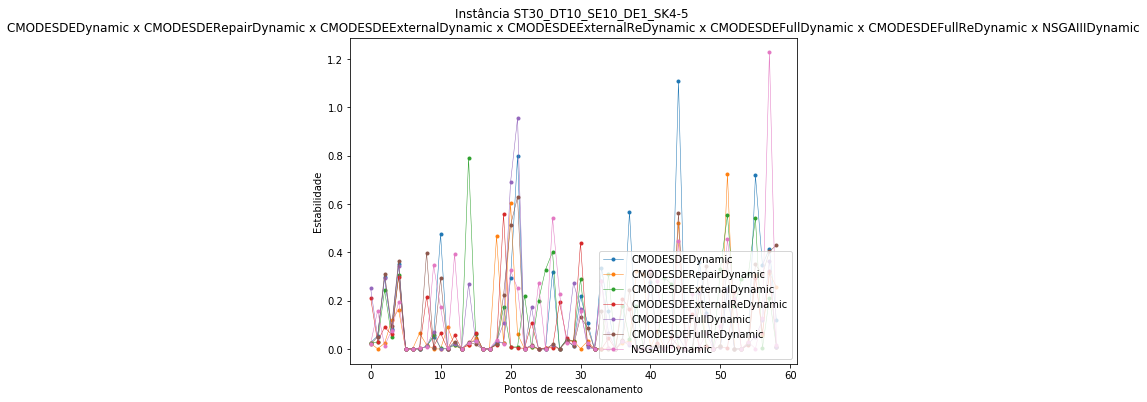

In [118]:
plot_stab(stab_event, inst, algorithms)

In [119]:
stat, p = friedmanchisquare(*datasets)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')


Statistics=152.686, p=2.092191E-30
Distribuições diferentes (rejeitar H0)


In [120]:
stat, p = friedmanchisquare(*datasetsAcc)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')

Statistics=68.551, p=8.102202E-13
Distribuições diferentes (rejeitar H0)


In [121]:
stat, p = friedmanchisquare(*datasetsStab)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')

Statistics=4.019, p=6.741047E-01
Mesmas distribuições (falhou em rejeitar H0)


In [122]:
df = pd.DataFrame({alg: hv_event[inst][alg].hypervolume for alg in algorithms})
df = df.melt(var_name="algorithm", value_name="hypervolume")
pc = sp.posthoc_conover(df, group_col="algorithm", val_col="hypervolume")
pc

CMODESDEDynamic  CMODESDEExternalDynamic  \
CMODESDEDynamic                  -1.00E+00                 2.66E-02   
CMODESDEExternalDynamic           2.66E-02                -1.00E+00   
CMODESDEExternalReDynamic         3.81E-02                 8.85E-01   
CMODESDEFullDynamic               8.41E-01                 1.57E-02   
CMODESDEFullReDynamic             7.59E-01                 5.57E-02   
CMODESDERepairDynamic             4.40E-01                 1.47E-01   
NSGAIIIDynamic                    2.34E-02                 9.61E-01   

                           CMODESDEExternalReDynamic  CMODESDEFullDynamic  \
CMODESDEDynamic                             3.81E-02             8.41E-01   
CMODESDEExternalDynamic                     8.85E-01             1.57E-02   
CMODESDEExternalReDynamic                  -1.00E+00             2.30E-02   
CMODESDEFullDynamic                         2.30E-02            -1.00E+00   
CMODESDEFullReDynamic                       7.69E-02             6.12E-01   
CMODESDERepairDynamic                       1.92E-01             3.30E-01   
NSGAIIIDynamic                              8.46E-01             1.37E-02   

                           CMODESDEFullReDynamic  CMODESDERepairDynamic  \
CMODESDEDynamic                         7.59E-01               4.40E-01   
CMODESDEExternalDynamic                 5.57E-02               1.47E-01   
CMODESDEExternalReDynamic               7.69E-02               1.92E-01   
CMODESDEFullDynamic                     6.12E-01               3.30E-01   
CMODESDEFullReDynamic                  -1.00E+00               6.41E-01   
CMODESDERepairDynamic                   6.41E-01              -1.00E+00   
NSGAIIIDynamic                          4.97E-02               1.34E-01   

                           NSGAIIIDynamic  
CMODESDEDynamic                  2.34E-02  
CMODESDEExternalDynamic          9.61E-01  
CMODESDEExternalReDynamic        8.46E-01  
CMODESDEFullDynamic              1.37E-02  
CMODESDEFullReDynamic            4.97E-02  
CMODESDERepairDynamic            1.34E-01  
NSGAIIIDynamic                  -1.00E+00

(<matplotlib.axes._subplots.AxesSubplot at 0x7fc79ff53b38>,
 <matplotlib.colorbar.ColorbarBase at 0x7fc79fb236d8>)

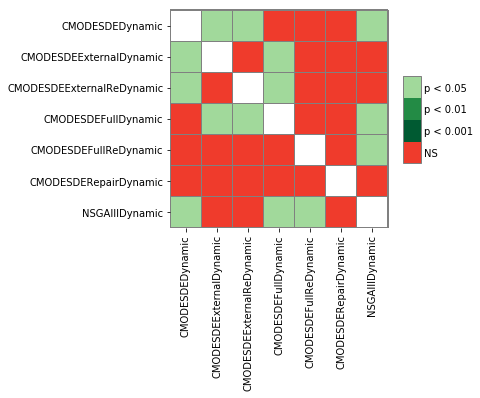

In [123]:
sp.sign_plot(pc, **heatmap_args)

### Instância ST30_DT10_SE15_DE1_SK4-5

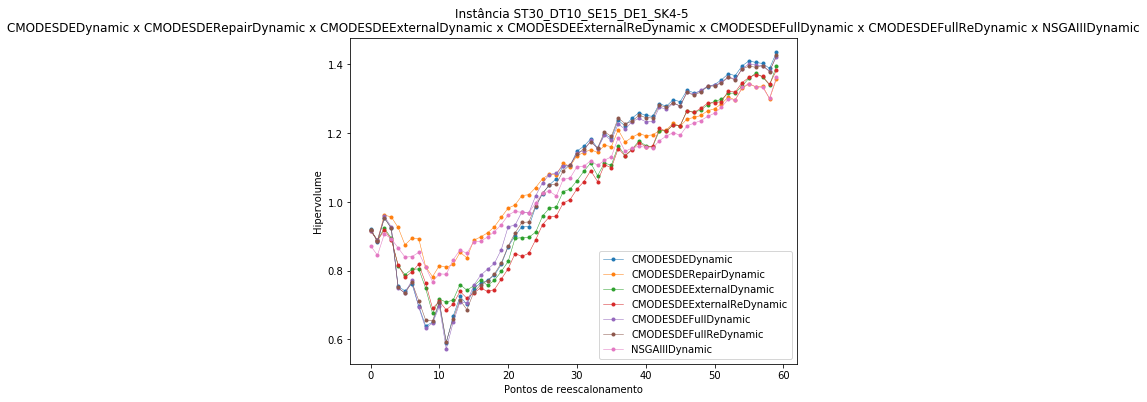

In [124]:
inst = "ST30_DT10_SE15_DE1_SK4-5"
algorithms = ["CMODESDEDynamic", "CMODESDERepairDynamic", "CMODESDEExternalDynamic", 
              "CMODESDEExternalReDynamic", "CMODESDEFullDynamic", "CMODESDEFullReDynamic", "NSGAIIIDynamic"]

datasets = [hv_event[inst][alg].hypervolume for alg in algorithms]
datasetsAcc = [acc_event[inst][alg].accuracy for alg in algorithms]
datasetsStab = [stab_event[inst][alg].stability for alg in algorithms]

plot_hv(hv_event, inst, algorithms)


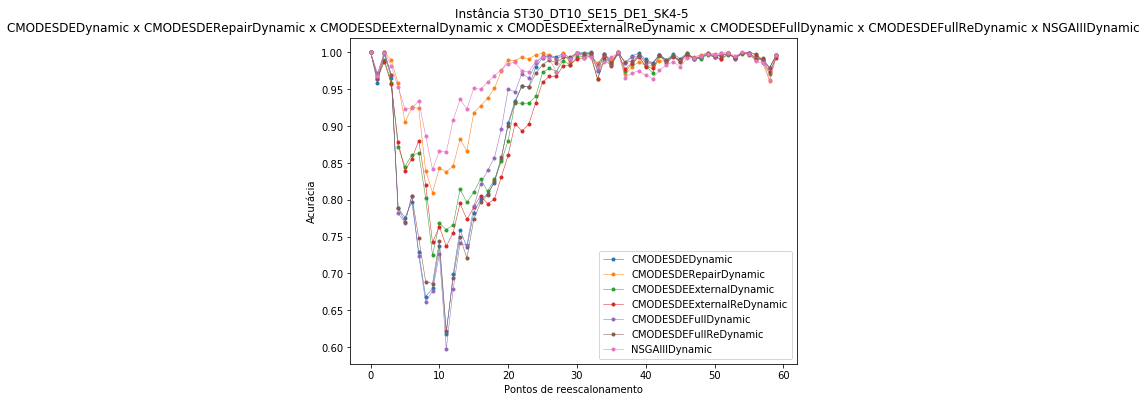

In [125]:
plot_acc(acc_event, inst, algorithms)


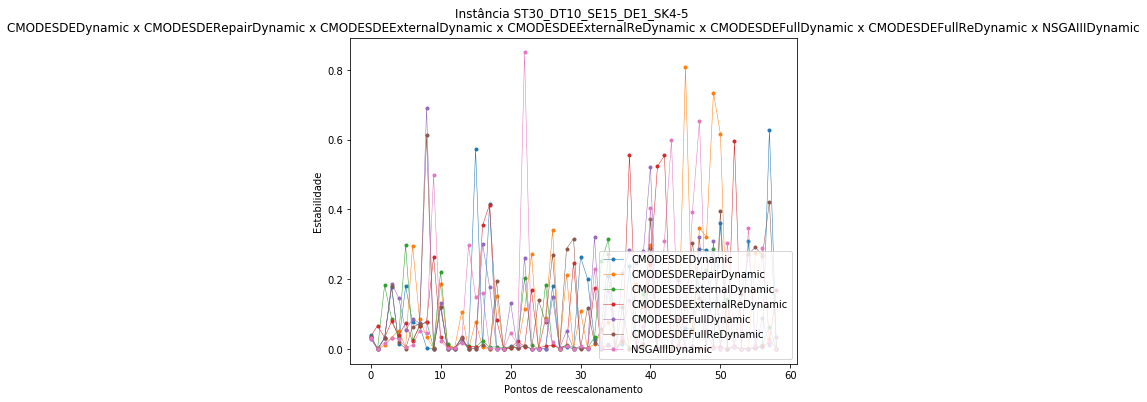

In [126]:
plot_stab(stab_event, inst, algorithms)

In [127]:
stat, p = friedmanchisquare(*datasets)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')


Statistics=71.071, p=2.464710E-13
Distribuições diferentes (rejeitar H0)


In [128]:
stat, p = friedmanchisquare(*datasetsAcc)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')

Statistics=52.337, p=1.595069E-09
Distribuições diferentes (rejeitar H0)


In [129]:
stat, p = friedmanchisquare(*datasetsStab)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')

Statistics=4.035, p=6.719878E-01
Mesmas distribuições (falhou em rejeitar H0)


In [130]:
df = pd.DataFrame({alg: hv_event[inst][alg].hypervolume for alg in algorithms})
df = df.melt(var_name="algorithm", value_name="hypervolume")
pc = sp.posthoc_conover(df, group_col="algorithm", val_col="hypervolume")
pc

CMODESDEDynamic  CMODESDEExternalDynamic  \
CMODESDEDynamic                  -1.00E+00                 3.40E-01   
CMODESDEExternalDynamic           3.40E-01                -1.00E+00   
CMODESDEExternalReDynamic         2.32E-01                 8.09E-01   
CMODESDEFullDynamic               9.67E-01                 3.19E-01   
CMODESDEFullReDynamic             9.45E-01                 3.76E-01   
CMODESDERepairDynamic             8.29E-01                 2.42E-01   
NSGAIIIDynamic                    6.82E-01                 5.85E-01   

                           CMODESDEExternalReDynamic  CMODESDEFullDynamic  \
CMODESDEDynamic                             2.32E-01             9.67E-01   
CMODESDEExternalDynamic                     8.09E-01             3.19E-01   
CMODESDEExternalReDynamic                  -1.00E+00             2.16E-01   
CMODESDEFullDynamic                         2.16E-01            -1.00E+00   
CMODESDEFullReDynamic                       2.60E-01             9.12E-01   
CMODESDERepairDynamic                       1.58E-01             8.61E-01   
NSGAIIIDynamic                              4.31E-01             6.52E-01   

                           CMODESDEFullReDynamic  CMODESDERepairDynamic  \
CMODESDEDynamic                         9.45E-01               8.29E-01   
CMODESDEExternalDynamic                 3.76E-01               2.42E-01   
CMODESDEExternalReDynamic               2.60E-01               1.58E-01   
CMODESDEFullDynamic                     9.12E-01               8.61E-01   
CMODESDEFullReDynamic                  -1.00E+00               7.75E-01   
CMODESDERepairDynamic                   7.75E-01              -1.00E+00   
NSGAIIIDynamic                          7.34E-01               5.32E-01   

                           NSGAIIIDynamic  
CMODESDEDynamic                  6.82E-01  
CMODESDEExternalDynamic          5.85E-01  
CMODESDEExternalReDynamic        4.31E-01  
CMODESDEFullDynamic              6.52E-01  
CMODESDEFullReDynamic            7.34E-01  
CMODESDERepairDynamic            5.32E-01  
NSGAIIIDynamic                  -1.00E+00

(<matplotlib.axes._subplots.AxesSubplot at 0x7fc79fba4e10>,
 <matplotlib.colorbar.ColorbarBase at 0x7fc79ffa45f8>)

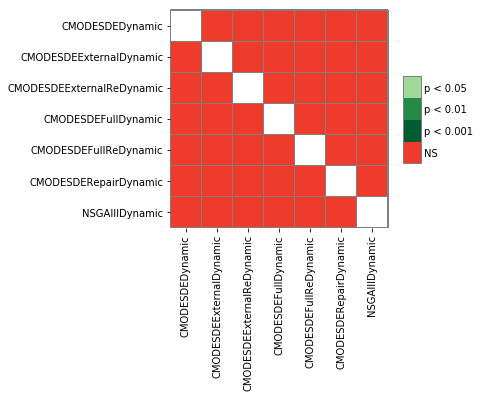

In [131]:
sp.sign_plot(pc, **heatmap_args)

### Instância ST30_DT10_SE5_DE1_SK6-7

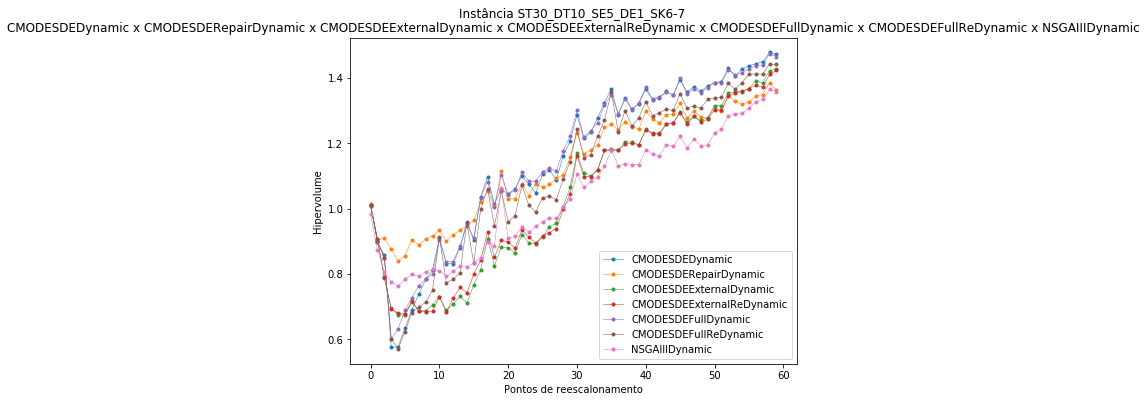

In [132]:
inst = "ST30_DT10_SE5_DE1_SK6-7"
algorithms = ["CMODESDEDynamic", "CMODESDERepairDynamic", "CMODESDEExternalDynamic", 
              "CMODESDEExternalReDynamic", "CMODESDEFullDynamic", "CMODESDEFullReDynamic", "NSGAIIIDynamic"]

datasets = [hv_event[inst][alg].hypervolume for alg in algorithms]
datasetsAcc = [acc_event[inst][alg].accuracy for alg in algorithms]
datasetsStab = [stab_event[inst][alg].stability for alg in algorithms]

plot_hv(hv_event, inst, algorithms)


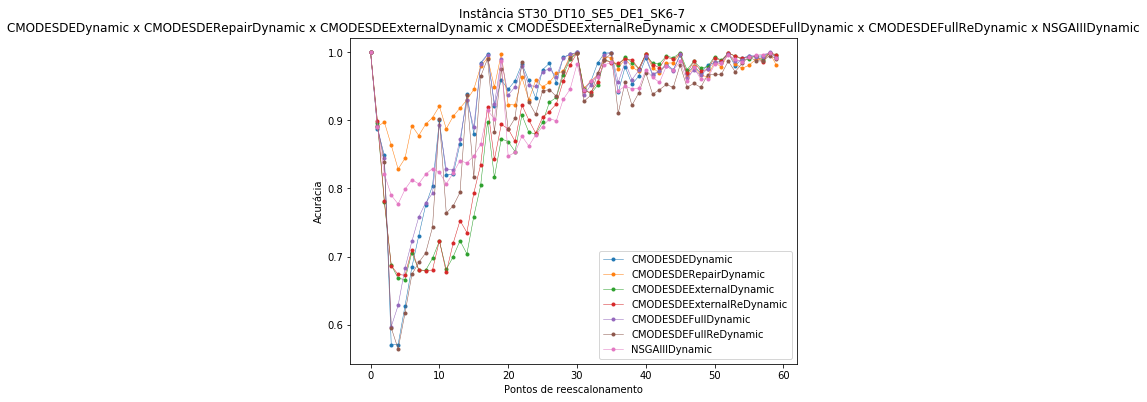

In [133]:
plot_acc(acc_event, inst, algorithms)


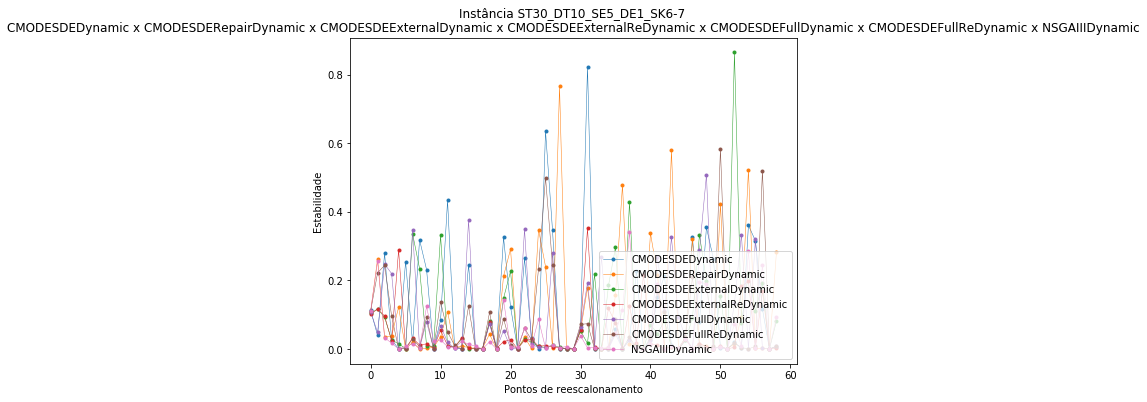

In [134]:
plot_stab(stab_event, inst, algorithms)

In [135]:
stat, p = friedmanchisquare(*datasets)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')


Statistics=191.729, p=1.091474E-38
Distribuições diferentes (rejeitar H0)


In [136]:
stat, p = friedmanchisquare(*datasetsAcc)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')

Statistics=66.251, p=2.395213E-12
Distribuições diferentes (rejeitar H0)


In [137]:
stat, p = friedmanchisquare(*datasetsStab)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')

Statistics=3.744, p=7.112572E-01
Mesmas distribuições (falhou em rejeitar H0)


In [138]:
df = pd.DataFrame({alg: hv_event[inst][alg].hypervolume for alg in algorithms})
df = df.melt(var_name="algorithm", value_name="hypervolume")
pc = sp.posthoc_conover(df, group_col="algorithm", val_col="hypervolume")
pc

CMODESDEDynamic  CMODESDEExternalDynamic  \
CMODESDEDynamic                  -1.00E+00                 5.16E-03   
CMODESDEExternalDynamic           5.16E-03                -1.00E+00   
CMODESDEExternalReDynamic         5.04E-03                 9.94E-01   
CMODESDEFullDynamic               9.79E-01                 4.77E-03   
CMODESDEFullReDynamic             2.42E-01                 1.02E-01   
CMODESDERepairDynamic             3.52E-01                 6.09E-02   
NSGAIIIDynamic                    1.58E-03                 7.12E-01   

                           CMODESDEExternalReDynamic  CMODESDEFullDynamic  \
CMODESDEDynamic                             5.04E-03             9.79E-01   
CMODESDEExternalDynamic                     9.94E-01             4.77E-03   
CMODESDEExternalReDynamic                  -1.00E+00             4.66E-03   
CMODESDEFullDynamic                         4.66E-03            -1.00E+00   
CMODESDEFullReDynamic                       1.00E-01             2.32E-01   
CMODESDERepairDynamic                       5.99E-02             3.38E-01   
NSGAIIIDynamic                              7.18E-01             1.44E-03   

                           CMODESDEFullReDynamic  CMODESDERepairDynamic  \
CMODESDEDynamic                         2.42E-01               3.52E-01   
CMODESDEExternalDynamic                 1.02E-01               6.09E-02   
CMODESDEExternalReDynamic               1.00E-01               5.99E-02   
CMODESDEFullDynamic                     2.32E-01               3.38E-01   
CMODESDEFullReDynamic                  -1.00E+00               8.11E-01   
CMODESDERepairDynamic                   8.11E-01              -1.00E+00   
NSGAIIIDynamic                          4.51E-02               2.50E-02   

                           NSGAIIIDynamic  
CMODESDEDynamic                  1.58E-03  
CMODESDEExternalDynamic          7.12E-01  
CMODESDEExternalReDynamic        7.18E-01  
CMODESDEFullDynamic              1.44E-03  
CMODESDEFullReDynamic            4.51E-02  
CMODESDERepairDynamic            2.50E-02  
NSGAIIIDynamic                  -1.00E+00

(<matplotlib.axes._subplots.AxesSubplot at 0x7fc79fc71748>,
 <matplotlib.colorbar.ColorbarBase at 0x7fc79fc38b70>)

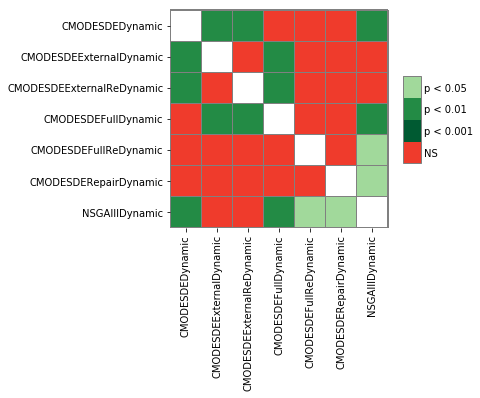

In [139]:
sp.sign_plot(pc, **heatmap_args)

### Instância ST30_DT10_SE10_DE1_SK6-7

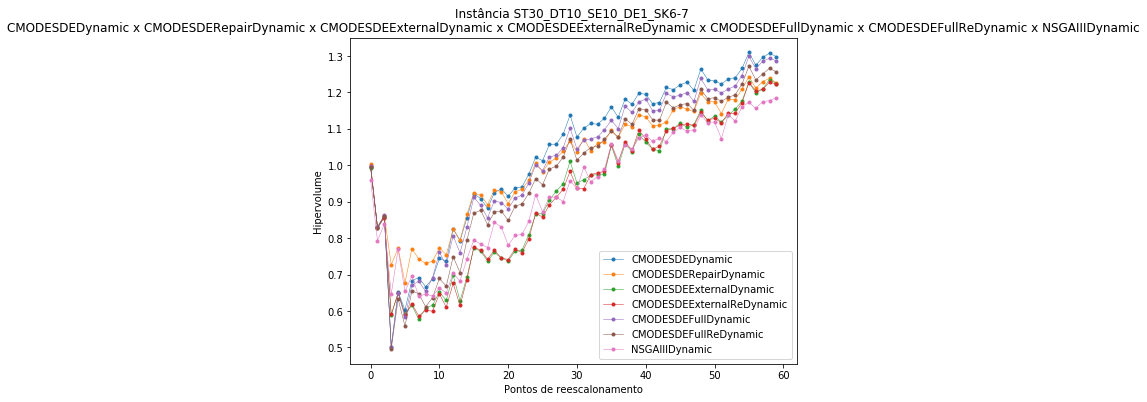

In [140]:
inst = "ST30_DT10_SE10_DE1_SK6-7"
algorithms = ["CMODESDEDynamic", "CMODESDERepairDynamic", "CMODESDEExternalDynamic", 
              "CMODESDEExternalReDynamic", "CMODESDEFullDynamic", "CMODESDEFullReDynamic", "NSGAIIIDynamic"]

datasets = [hv_event[inst][alg].hypervolume for alg in algorithms]
datasetsAcc = [acc_event[inst][alg].accuracy for alg in algorithms]
datasetsStab = [stab_event[inst][alg].stability for alg in algorithms]

plot_hv(hv_event, inst, algorithms)


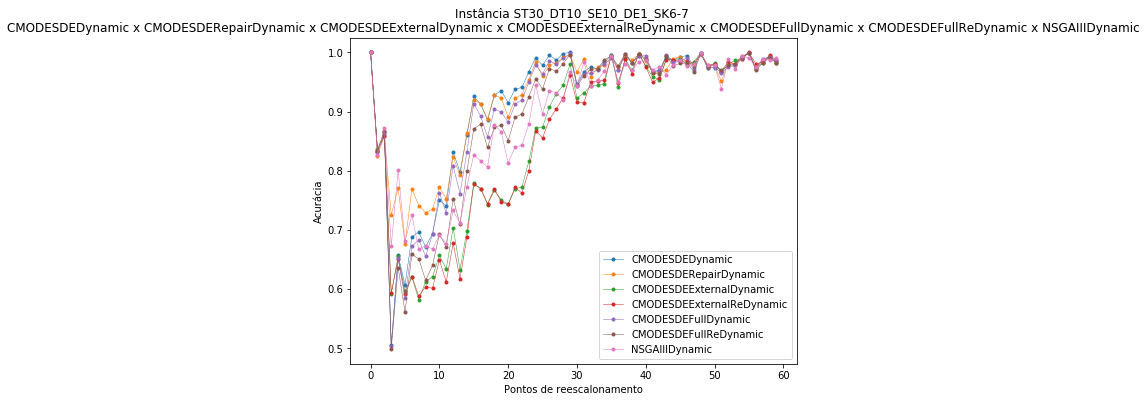

In [141]:
plot_acc(acc_event, inst, algorithms)


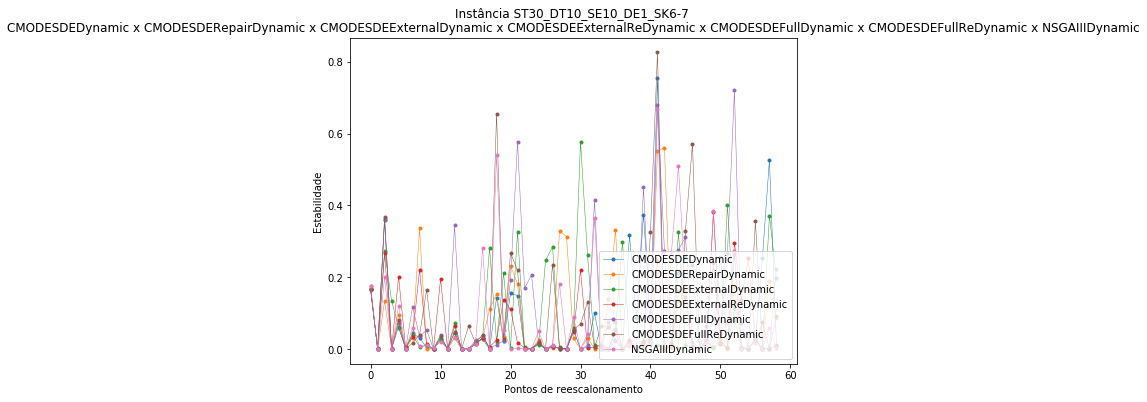

In [142]:
plot_stab(stab_event, inst, algorithms)

In [143]:
stat, p = friedmanchisquare(*datasets)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')


Statistics=245.786, p=3.261378E-50
Distribuições diferentes (rejeitar H0)


In [144]:
stat, p = friedmanchisquare(*datasetsAcc)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')

Statistics=80.702, p=2.558246E-15
Distribuições diferentes (rejeitar H0)


In [145]:
stat, p = friedmanchisquare(*datasetsStab)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')

Statistics=7.733, p=2.583556E-01
Mesmas distribuições (falhou em rejeitar H0)


In [146]:
df = pd.DataFrame({alg: hv_event[inst][alg].hypervolume for alg in algorithms})
df = df.melt(var_name="algorithm", value_name="hypervolume")
pc = sp.posthoc_conover(df, group_col="algorithm", val_col="hypervolume")
pc

CMODESDEDynamic  CMODESDEExternalDynamic  \
CMODESDEDynamic                  -1.00E+00                 1.10E-03   
CMODESDEExternalDynamic           1.10E-03                -1.00E+00   
CMODESDEExternalReDynamic         8.89E-04                 9.50E-01   
CMODESDEFullDynamic               5.06E-01                 9.11E-03   
CMODESDEFullReDynamic             1.45E-01                 6.85E-02   
CMODESDERepairDynamic             2.97E-01                 2.55E-02   
NSGAIIIDynamic                    1.36E-03                 9.51E-01   

                           CMODESDEExternalReDynamic  CMODESDEFullDynamic  \
CMODESDEDynamic                             8.89E-04             5.06E-01   
CMODESDEExternalDynamic                     9.50E-01             9.11E-03   
CMODESDEExternalReDynamic                  -1.00E+00             7.60E-03   
CMODESDEFullDynamic                         7.60E-03            -1.00E+00   
CMODESDEFullReDynamic                       5.97E-02             4.28E-01   
CMODESDERepairDynamic                       2.17E-02             7.06E-01   
NSGAIIIDynamic                              9.02E-01             1.09E-02   

                           CMODESDEFullReDynamic  CMODESDERepairDynamic  \
CMODESDEDynamic                         1.45E-01               2.97E-01   
CMODESDEExternalDynamic                 6.85E-02               2.55E-02   
CMODESDEExternalReDynamic               5.97E-02               2.17E-02   
CMODESDEFullDynamic                     4.28E-01               7.06E-01   
CMODESDEFullReDynamic                  -1.00E+00               6.78E-01   
CMODESDERepairDynamic                   6.78E-01              -1.00E+00   
NSGAIIIDynamic                          7.83E-02               2.97E-02   

                           NSGAIIIDynamic  
CMODESDEDynamic                  1.36E-03  
CMODESDEExternalDynamic          9.51E-01  
CMODESDEExternalReDynamic        9.02E-01  
CMODESDEFullDynamic              1.09E-02  
CMODESDEFullReDynamic            7.83E-02  
CMODESDERepairDynamic            2.97E-02  
NSGAIIIDynamic                  -1.00E+00

(<matplotlib.axes._subplots.AxesSubplot at 0x7fc79fa7beb8>,
 <matplotlib.colorbar.ColorbarBase at 0x7fc79f97dd30>)

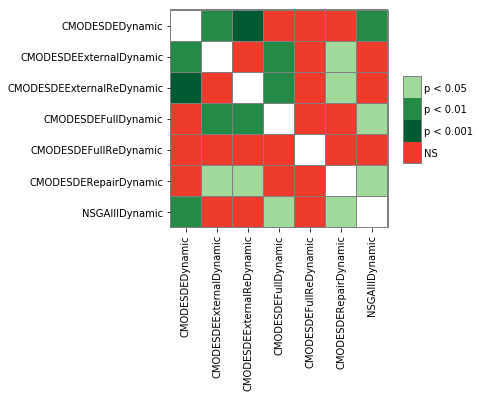

In [147]:
sp.sign_plot(pc, **heatmap_args)

### Instância ST30_DT10_SE15_DE1_SK6-7

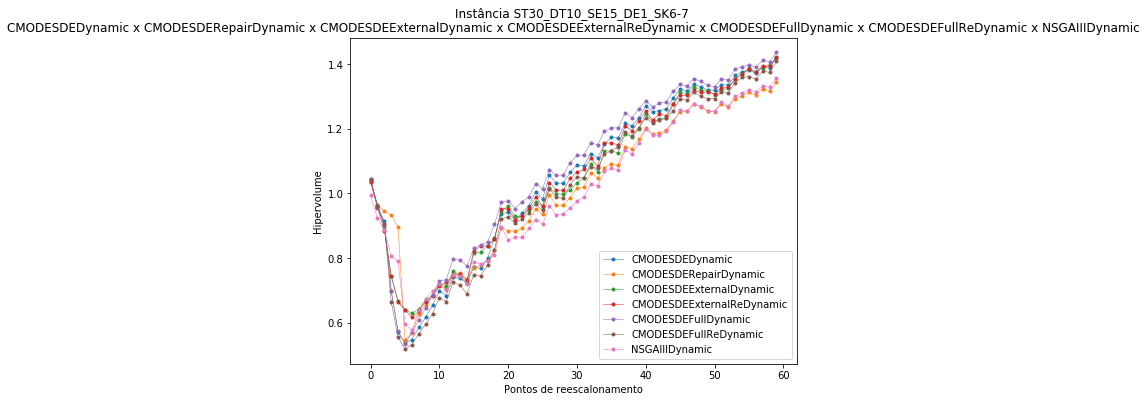

In [148]:
inst = "ST30_DT10_SE15_DE1_SK6-7"
algorithms = ["CMODESDEDynamic", "CMODESDERepairDynamic", "CMODESDEExternalDynamic", 
              "CMODESDEExternalReDynamic", "CMODESDEFullDynamic", "CMODESDEFullReDynamic", "NSGAIIIDynamic"]

datasets = [hv_event[inst][alg].hypervolume for alg in algorithms]
datasetsAcc = [acc_event[inst][alg].accuracy for alg in algorithms]
datasetsStab = [stab_event[inst][alg].stability for alg in algorithms]

plot_hv(hv_event, inst, algorithms)


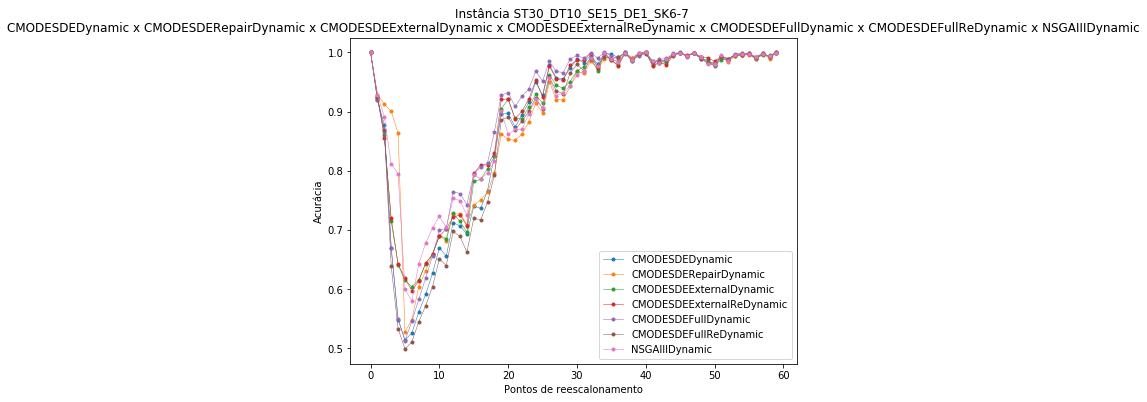

In [149]:
plot_acc(acc_event, inst, algorithms)


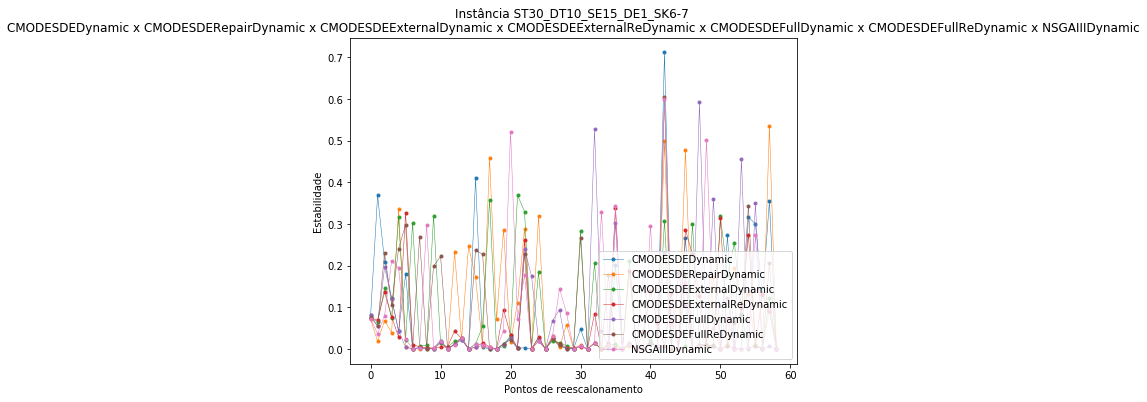

In [150]:
plot_stab(stab_event, inst, algorithms)

In [151]:
stat, p = friedmanchisquare(*datasets)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')


Statistics=188.621, p=4.996645E-38
Distribuições diferentes (rejeitar H0)


In [152]:
stat, p = friedmanchisquare(*datasetsAcc)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')

Statistics=44.677, p=5.426410E-08
Distribuições diferentes (rejeitar H0)


In [153]:
stat, p = friedmanchisquare(*datasetsStab)
print('Statistics=%.3f, p=%6E' % (stat, p))
if p > alpha:
    print('Mesmas distribuições (falhou em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeitar H0)')

Statistics=8.753, p=1.879457E-01
Mesmas distribuições (falhou em rejeitar H0)


In [154]:
df = pd.DataFrame({alg: hv_event[inst][alg].hypervolume for alg in algorithms})
df = df.melt(var_name="algorithm", value_name="hypervolume")
pc = sp.posthoc_conover(df, group_col="algorithm", val_col="hypervolume")
pc

CMODESDEDynamic  CMODESDEExternalDynamic  \
CMODESDEDynamic                  -1.00E+00                 8.49E-01   
CMODESDEExternalDynamic           8.49E-01                -1.00E+00   
CMODESDEExternalReDynamic         9.15E-01                 9.34E-01   
CMODESDEFullDynamic               5.53E-01                 4.33E-01   
CMODESDEFullReDynamic             5.14E-01                 6.44E-01   
CMODESDERepairDynamic             3.04E-01                 4.02E-01   
NSGAIIIDynamic                    2.04E-01                 2.80E-01   

                           CMODESDEExternalReDynamic  CMODESDEFullDynamic  \
CMODESDEDynamic                             9.15E-01             5.53E-01   
CMODESDEExternalDynamic                     9.34E-01             4.33E-01   
CMODESDEExternalReDynamic                  -1.00E+00             4.84E-01   
CMODESDEFullDynamic                         4.84E-01            -1.00E+00   
CMODESDEFullReDynamic                       5.86E-01             2.13E-01   
CMODESDERepairDynamic                       3.57E-01             1.05E-01   
NSGAIIIDynamic                              2.44E-01             6.27E-02   

                           CMODESDEFullReDynamic  CMODESDERepairDynamic  \
CMODESDEDynamic                         5.14E-01               3.04E-01   
CMODESDEExternalDynamic                 6.44E-01               4.02E-01   
CMODESDEExternalReDynamic               5.86E-01               3.57E-01   
CMODESDEFullDynamic                     2.13E-01               1.05E-01   
CMODESDEFullReDynamic                  -1.00E+00               7.06E-01   
CMODESDERepairDynamic                   7.06E-01              -1.00E+00   
NSGAIIIDynamic                          5.35E-01               8.08E-01   

                           NSGAIIIDynamic  
CMODESDEDynamic                  2.04E-01  
CMODESDEExternalDynamic          2.80E-01  
CMODESDEExternalReDynamic        2.44E-01  
CMODESDEFullDynamic              6.27E-02  
CMODESDEFullReDynamic            5.35E-01  
CMODESDERepairDynamic            8.08E-01  
NSGAIIIDynamic                  -1.00E+00

(<matplotlib.axes._subplots.AxesSubplot at 0x7fc79fa7bfd0>,
 <matplotlib.colorbar.ColorbarBase at 0x7fc79fd67208>)

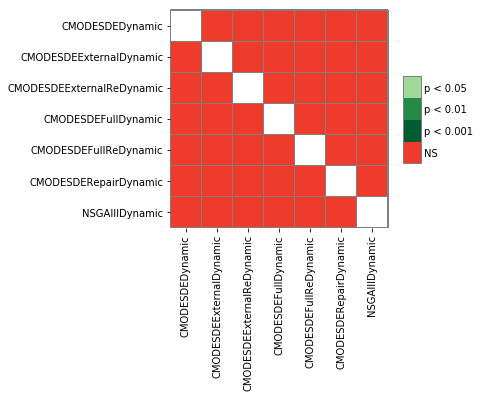

In [155]:
sp.sign_plot(pc, **heatmap_args)